In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Data Analysis and Manipulation
import random as rnd # pseudo-random number generators 
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization
import matplotlib.pyplot as plt # 2D plotting library
import seaborn as sns           # Statistical data visualization

# Machine Learning: Modelling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Machine Learning: Helpers
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Others 
import os # Operating system funcionalities

# Configure visualisations
sns.set_style("whitegrid")       # Default seaborn style sheet. Values: darkgrid, whitegrid, dark, white, ticks
sns.despine()                   # Remove the axis spines for the top and right axes

# Magic command/function to render the plots in the notebook itself
%matplotlib inline              



## Acquire data


In [2]:
# In this competition, the two files are named test.csv and train.csv. 
# We'll start by using pandas.read_csv() library to read both files and then inspect their size.
train = pd.read_csv("data/train.csv", sep=",")
test = pd.read_csv("data/test.csv", sep=",")
titanic = [train, test]

# pandas.DataFrame.shape: Return a tuple representing the dimensionality of the DataFrame.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html#pandas.DataFrame.shape
print("TRAINING SET")
print("-"*50)
trainDimensions = train.shape;
print("Type: {}".format(type(test)))
print("Dimensions: {}".format(trainDimensions))
print("Number of rows: {}".format(trainDimensions[0]))
print("Number of columns: {}".format(trainDimensions[1]))
print()

print("TESTING SET")
print("-"*50)
testDimensions = test.shape;
print("Type: {}".format(type(train)))
print("Dimensions: {}".format(testDimensions))
print("Number of rows: {}".format(testDimensions[0]))
print("Number of columns: {}".format(testDimensions[1]))

TRAINING SET
--------------------------------------------------
Type: <class 'pandas.core.frame.DataFrame'>
Dimensions: (891, 12)
Number of rows: 891
Number of columns: 12

TESTING SET
--------------------------------------------------
Type: <class 'pandas.core.frame.DataFrame'>
Dimensions: (418, 11)
Number of rows: 418
Number of columns: 11


## Exploring the data


#### Training Set

In [3]:
# pandas.DataFrame.sample(n=1): Returns a random sample of items of a dataframe.
# More info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.05,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.00,B96 B98,S
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.00,NaN,S


In [4]:
# Let's take a look at the first rows of the train dataframe.
# DataFrame.head(n=5): Return the first n rows.
# More info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Let's take a look at the last rows of the train dataframe.
# DataFrame.tail(n=5): Return the last n rows.
# More info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
train.tail(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Testing Set

In [6]:
# pandas.DataFrame.sample(n=1): Returns a random sample of items of a dataframe.
# More info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
test.sample(3)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
91,983,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.7750,NaN,S
367,1259,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S
356,1248,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S


In [7]:
# Let's take a look at the first few rows of the test dataframe.
# DataFrame.head(n=5): Return the first n rows.
# More info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Let's take a look at the last rows of the test dataframe.
# DataFrame.tail(n=5): Return the last n rows.
# More info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
test.tail()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**Operavations on DataFrame**

In [9]:
# The iloc method allows us to retrieve rows and columns by position. 
# In order to do that, we'll need to specify the positions of the rows that we want, and the positions of the columns that we want as well.
train.iloc[0]


PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [10]:
type(train.iloc[0])

pandas.core.series.Series

In [11]:
# pandas.DataFrame.sample(n=1): Returns a random sample of items of a dataframe.
# More info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html
train.sample(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S


In [12]:
train.iloc[0:3]
#train.loc[0:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
train.iloc[[1,3,5]]
#train.loc[[1,3,5]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [14]:
train.iloc[:]
#train.loc[:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
train.iloc[:5]
#train.loc[:5]    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.iloc[888:]
#train.loc[888:]    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
train.iloc[:5,0:5]

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


In [18]:
train.iloc[0:3,[1, 3,4,10,2]]

,Survived,Name,Sex,Cabin,Pclass
0,0,"Braund, Mr. Owen Harris",male,NaN,3
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C85,1
2,1,"Heikkinen, Miss. Laina",female,NaN,3


In [19]:
train.iloc[:5, [0,3,4,5,2,1]]

,PassengerId,Name,Sex,Age,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1
4,5,"Allen, Mr. William Henry",male,35.0,3,0


In [20]:
train.loc[:, ["Name", "Sex", "Pclass", "Survived"]]                                                          

,Name,Sex,Pclass,Survived
0,"Braund, Mr. Owen Harris",male,3,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1
2,"Heikkinen, Miss. Laina",female,3,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1
4,"Allen, Mr. William Henry",male,3,0
5,"Moran, Mr. James",male,3,0
6,"McCarthy, Mr. Timothy J",male,1,0
7,"Palsson, Master. Gosta Leonard",male,3,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,2,1


In [21]:
train[["Name", "Sex", "Pclass", "Age", "Survived"]]                                        

,Name,Sex,Pclass,Age,Survived
0,"Braund, Mr. Owen Harris",male,3,22.0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,38.0,1
2,"Heikkinen, Miss. Laina",female,3,26.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,35.0,1
4,"Allen, Mr. William Henry",male,3,35.0,0
5,"Moran, Mr. James",male,3,NaN,0
6,"McCarthy, Mr. Timothy J",male,1,54.0,0
7,"Palsson, Master. Gosta Leonard",male,3,2.0,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3,27.0,1
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,2,14.0,1


**Some queries on dataframe**

In [22]:
train[train["Survived"] == 0][["Pclass", "Name", "Sex", "Age"]]                                                  

,Pclass,Name,Sex,Age
0,3,"Braund, Mr. Owen Harris",male,22.0
4,3,"Allen, Mr. William Henry",male,35.0
5,3,"Moran, Mr. James",male,NaN
6,1,"McCarthy, Mr. Timothy J",male,54.0
7,3,"Palsson, Master. Gosta Leonard",male,2.0
12,3,"Saundercock, Mr. William Henry",male,20.0
13,3,"Andersson, Mr. Anders Johan",male,39.0
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
16,3,"Rice, Master. Eugene",male,2.0
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0


In [23]:
train[train["Survived"] == 1][["Pclass", "Name", "Sex", "Age"]].sort_values(by=["Pclass", "Name"], ascending=[True, True])        

,Pclass,Name,Sex,Age
730,1,"Allen, Miss. Elisabeth Walton",female,29.00
305,1,"Allison, Master. Hudson Trevor",male,0.92
460,1,"Anderson, Mr. Harry",male,48.00
275,1,"Andrews, Miss. Kornelia Theodosia",female,63.00
571,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00
700,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00
369,1,"Aubart, Mme. Leontine Pauline",female,24.00
290,1,"Barber, Miss. Ellen ""Nellie""",female,26.00
630,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00


In [24]:
train[train["Sex"] == "male"][["PassengerId","Name", "Sex", "Age", "Embarked", "Survived"]].sort_values(by=["Name","Age"], ascending = [True, False])

,PassengerId,Name,Sex,Age,Embarked,Survived
845,846,"Abbing, Mr. Anthony",male,42.00,S,0
746,747,"Abbott, Mr. Rossmore Edward",male,16.00,S,0
308,309,"Abelson, Mr. Samuel",male,30.00,C,0
365,366,"Adahl, Mr. Mauritz Nils Martin",male,30.00,S,0
401,402,"Adams, Mr. John",male,26.00,S,0
207,208,"Albimona, Mr. Nassef Cassem",male,26.00,C,1
810,811,"Alexander, Mr. William",male,26.00,S,0
840,841,"Alhomaki, Mr. Ilmari Rudolf",male,20.00,S,0
210,211,"Ali, Mr. Ahmed",male,24.00,S,0
784,785,"Ali, Mr. William",male,25.00,S,0


In [25]:
train[train["Sex"] == "female"][["PassengerId","Name", "Sex", "Age", "Embarked", "Survived"]].sort_values(by=["Name","Age"], ascending = [True, False])

,PassengerId,Name,Sex,Age,Embarked,Survived
279,280,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,S,1
874,875,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.00,C,1
40,41,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,S,0
855,856,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,S,1
730,731,"Allen, Miss. Elisabeth Walton",female,29.00,S,1
297,298,"Allison, Miss. Helen Loraine",female,2.00,S,0
498,499,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,S,0
192,193,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.00,S,1
813,814,"Andersson, Miss. Ebba Iris Alfrida",female,6.00,S,0
119,120,"Andersson, Miss. Ellis Anna Maria",female,2.00,S,0


In [26]:
train[["PassengerId","Name", "Sex", "Age", "Embarked", "Survived"]].sort_values(by=["Age", "Name"], ascending = [False, True])

,PassengerId,Name,Sex,Age,Embarked,Survived
630,631,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,S,1
851,852,"Svensson, Mr. Johan",male,74.0,S,0
493,494,"Artagaveytia, Mr. Ramon",male,71.0,C,0
96,97,"Goldschmidt, Mr. George B",male,71.0,C,0
116,117,"Connors, Mr. Patrick",male,70.5,Q,0
745,746,"Crosby, Capt. Edward Gifford",male,70.0,S,0
672,673,"Mitchell, Mr. Henry Michael",male,70.0,S,0
33,34,"Wheadon, Mr. Edward H",male,66.0,S,0
280,281,"Duane, Mr. Frank",male,65.0,Q,0
456,457,"Millet, Mr. Francis Davis",male,65.0,S,0


In [27]:
train[train["Sex"] == "male"][["PassengerId","Name", "Sex", "Age", "Embarked", "Survived"]].sort_values(by=["Age", "Name"], ascending = [False, True])

,PassengerId,Name,Sex,Age,Embarked,Survived
630,631,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,S,1
851,852,"Svensson, Mr. Johan",male,74.0,S,0
493,494,"Artagaveytia, Mr. Ramon",male,71.0,C,0
96,97,"Goldschmidt, Mr. George B",male,71.0,C,0
116,117,"Connors, Mr. Patrick",male,70.5,Q,0
745,746,"Crosby, Capt. Edward Gifford",male,70.0,S,0
672,673,"Mitchell, Mr. Henry Michael",male,70.0,S,0
33,34,"Wheadon, Mr. Edward H",male,66.0,S,0
280,281,"Duane, Mr. Frank",male,65.0,Q,0
456,457,"Millet, Mr. Francis Davis",male,65.0,S,0


In [28]:
train[train["Sex"] == "female"][["PassengerId","Name", "Sex", "Age", "Embarked", "Survived"]].sort_values(by=["Age", "Name"], ascending = [False, True])

,PassengerId,Name,Sex,Age,Embarked,Survived
275,276,"Andrews, Miss. Kornelia Theodosia",female,63.0,S,1
483,484,"Turkula, Mrs. (Hedwig)",female,63.0,S,1
829,830,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,NaN,1
366,367,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,C,1
11,12,"Bonnell, Miss. Elizabeth",female,58.0,S,1
268,269,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,S,1
195,196,"Lurette, Miss. Elise",female,58.0,C,1
772,773,"Mack, Mrs. (Mary)",female,57.0,S,0
879,880,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,C,1
15,16,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,S,1


In [29]:
train[(train["Sex"] == "female") & (train["Survived"] == 0) & (train["Pclass"].isin([1,2]))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S


**Which features are available in the dataset?**

In [30]:
# pandas.DataFrame.dtypes: Return the dtypes in this object.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dtypes.html#pandas.DataFrame.dtypes
train.dtypes               

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
# pandas.DataFrame.dtypes: Return the dtypes in this object.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dtypes.html#pandas.DataFrame.dtypes
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [32]:
# pandas.DataFrame.count: Return Series with number of non-NA/null observations over requested axis
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [33]:
# pandas.DataFrame.count: Return Series with number of non-NA/null observations over requested axis
test.count() 

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [34]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [35]:
# pandas.DataFrame.info: Concise summary of a DataFrame.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
train.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [36]:
# pandas.DataFrame.info: Concise summary of a DataFrame.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
test.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
train["Survived"].mean()

0.3838383838383838

In [38]:
train.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [39]:
# Get the columns of a DataFrame as a list:
print(train.columns.tolist())
print(list(train.columns.values))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## Feature: Survived

In [40]:
print("Survived: {}".format(train["Survived"].dtype))
print("Total: {}".format(train.shape[0]))
print("Values: {}".format(train["Survived"].count()))
print("Is Empty: {}".format(train["Survived"].isnull().any()))
print("Empty: {}".format(train["Survived"].isnull().sum()))
print("Mean: {}".format(train["Survived"].mean()))
# Also have: max(), min(), std(), ...

Survived: int64
Total: 891
Values: 891
Is Empty: False
Empty: 0
Mean: 0.3838383838383838


In [41]:
#How many people in your training set survived the disaster with the Titanic? 
train["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [42]:
# absolute numbers
train["Survived"].value_counts()
#train["Survived"].value_counts().sort_index()
#train["Survived"].value_counts().sort_values(ascending=True) 

0    549
1    342
Name: Survived, dtype: int64

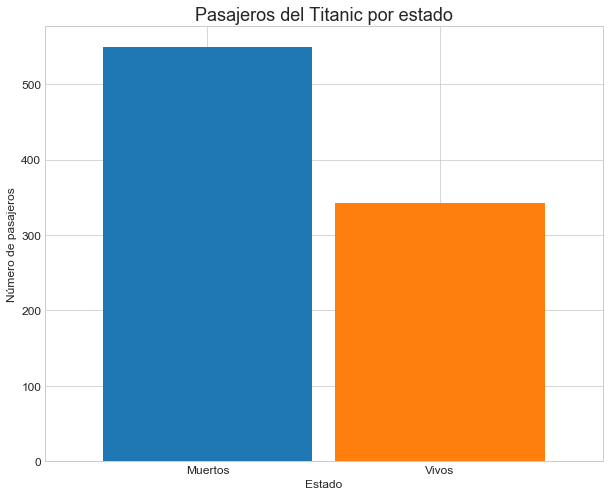

In [43]:
series = train["Survived"].value_counts()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Pasajeros del Titanic por estado", fontsize=18)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()      

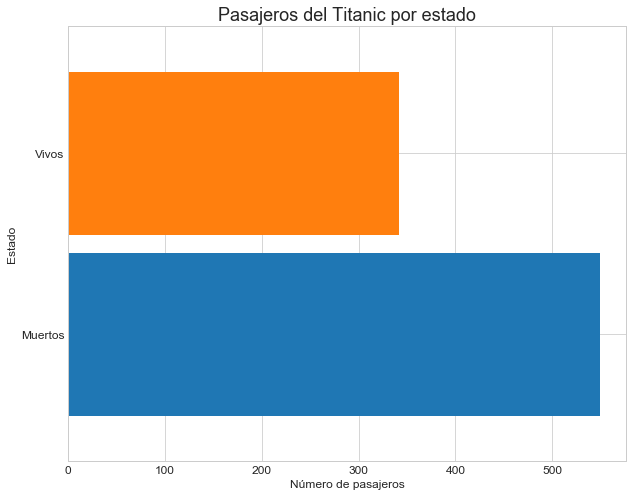

In [44]:
series = train["Survived"].value_counts()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Pasajeros del Titanic por estado", fontsize=18)
plt.xlabel("Número de pasajeros", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()                                                                                      

In [45]:
# percentages
train["Survived"].value_counts(normalize = True).sort_index()
#train["Survived"].value_counts(normalize = True).sort_values(ascending=False)  

0    0.616162
1    0.383838
Name: Survived, dtype: float64

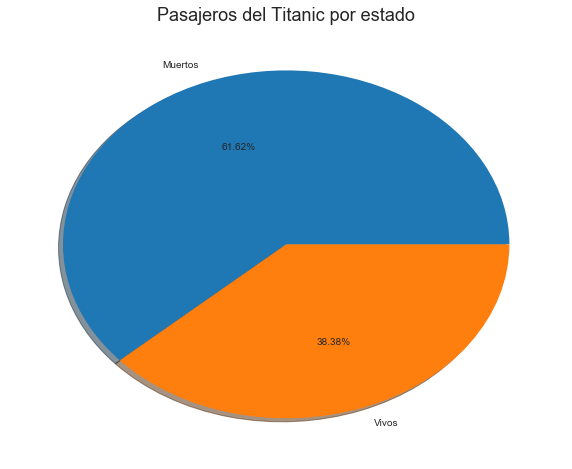

In [46]:
series = train["Survived"].value_counts(normalize = True)
series.plot.pie(labels = ["Muertos", "Vivos"],autopct='%.2f%%', shadow=True, figsize=(10,8))
plt.title("Pasajeros del Titanic por estado", fontsize=18)
plt.ylabel("")
plt.show()           

In [47]:
train.groupby(["Survived"]).size()
#train.groupby(["Survived"]).size().sort_index(ascending=True)

Survived
0    549
1    342
dtype: int64

In [48]:
(train.groupby(["Survived"]).size() / train["Survived"].count()) * 100

Survived
0    61.616162
1    38.383838
dtype: float64

## Feature: Sex            

In [49]:
print("Sex: {}".format(train["Sex"].dtype))
print("Total: {}".format(train.shape[0]))
print("Values: {}".format(train["Sex"].count()))
print("Is Empty: {}".format(train["Sex"].isnull().any()))
print("Empty: {}".format(train["Sex"].isnull().sum())) 

Sex: object
Total: 891
Values: 891
Is Empty: False
Empty: 0


In [50]:
train["Sex"].describe()                         

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [51]:
# absolute numbers
train["Sex"].value_counts().sort_index()                 

female    314
male      577
Name: Sex, dtype: int64

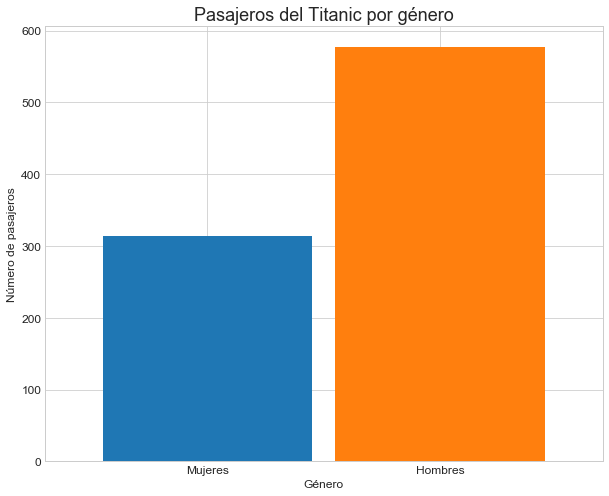

In [52]:
series = train["Sex"].value_counts().sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Pasajeros del Titanic por género", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Mujeres", "Hombres"], fontsize=12, rotation=360)
plt.show()    

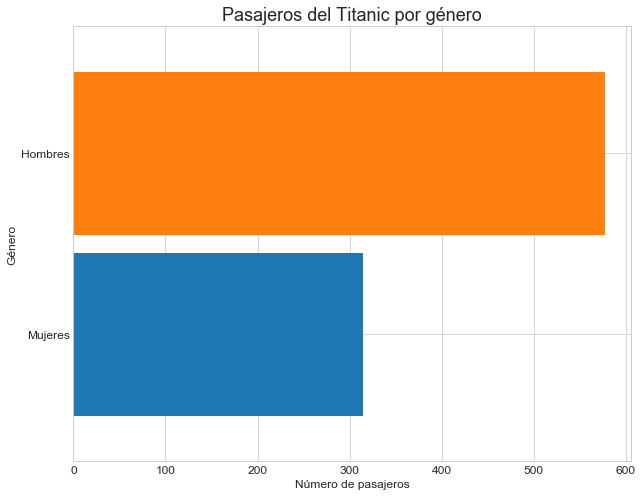

In [53]:
series = train["Sex"].value_counts().sort_index()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Pasajeros del Titanic por género", fontsize=18)
plt.ylabel("Género", fontsize=12)
plt.xlabel("Número de pasajeros", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1],  ["Mujeres", "Hombres"], fontsize=12, rotation=360)
plt.show()  

In [54]:
# percentages
train["Sex"].value_counts(normalize = True).sort_index()  

female    0.352413
male      0.647587
Name: Sex, dtype: float64

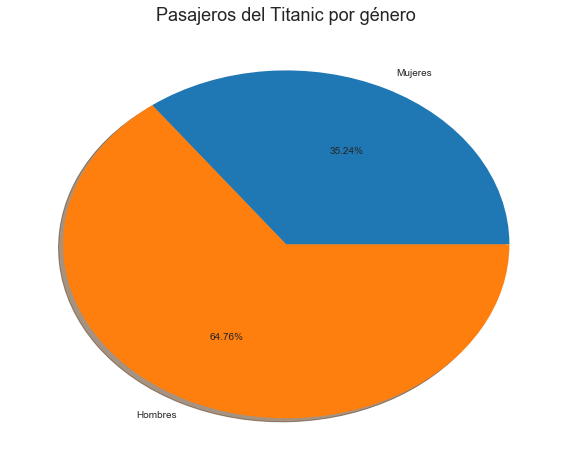

In [55]:
series = train["Sex"].value_counts(normalize = True).sort_index()
series.plot.pie(labels = ["Mujeres", "Hombres"],autopct='%.2f%%', shadow=True, figsize=(10,8))
plt.title("Pasajeros del Titanic por género", fontsize=18)
plt.ylabel("")
plt.show()                         

In [56]:
train.groupby(["Sex"]).size()   

Sex
female    314
male      577
dtype: int64

In [57]:
train.groupby(["Sex"]).size() / train["Sex"].count()   

Sex
female    0.352413
male      0.647587
dtype: float64

**¿Cuántos hombres sobrevivieron?**

In [58]:
# Males that survived vs males that passed away
train[train["Sex"] == 'male']["Survived"].value_counts().sort_index()   

0    468
1    109
Name: Survived, dtype: int64

In [59]:
train[train["Sex"] == "male"].groupby("Survived").size().sort_index()  

Survived
0    468
1    109
dtype: int64

In [60]:
# Males that survived vs males that passed away (percentage)
train[train["Sex"] == "male"]["Survived"].value_counts(normalize = True).sort_index()              

0    0.811092
1    0.188908
Name: Survived, dtype: float64

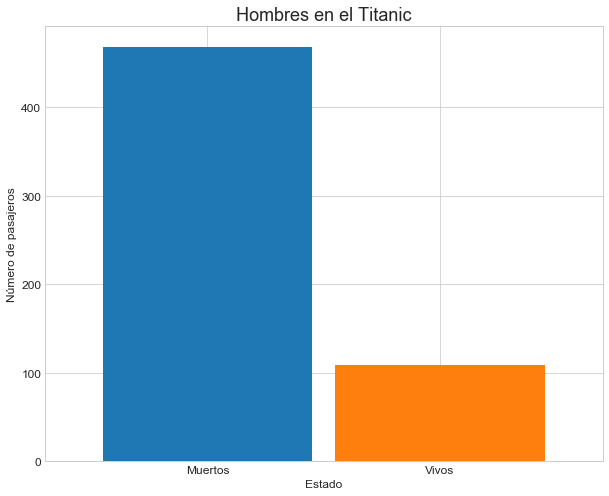

In [61]:
series = train[train["Sex"] == 'male']["Survived"].value_counts().sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Hombres en el Titanic", fontsize=18)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()

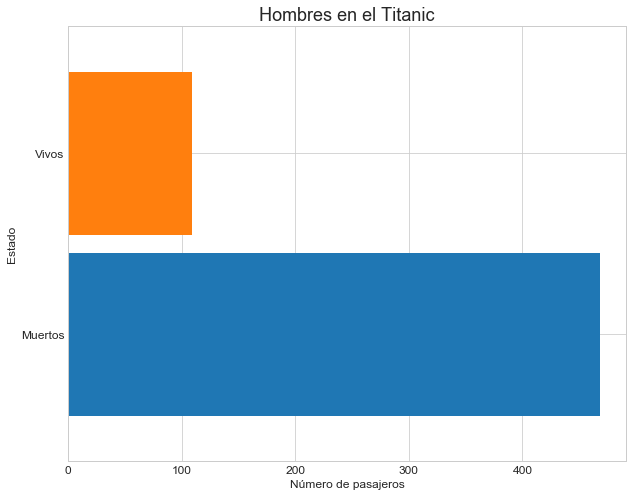

In [62]:
series = train[train["Sex"] == 'male']["Survived"].value_counts().sort_index()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Hombres en el Titanic", fontsize=18)
plt.xlabel("Número de pasajeros", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show() 

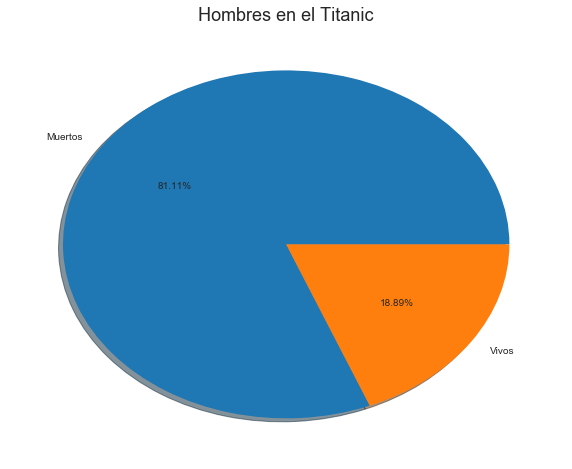

In [63]:
series = train[train["Sex"] == "male"]["Survived"].value_counts(normalize = True).sort_index()
series.plot.pie(labels = ["Muertos", "Vivos"],autopct='%.2f%%', shadow=True, figsize=(10,8))
plt.title("Hombres en el Titanic", fontsize=18)
plt.ylabel("")
plt.show()  

**¿Cuántas mujeros sobrevivieron?**

In [64]:
# Females that survived vs Females that passed away
train[train["Sex"] == "female"]["Survived"].value_counts().sort_index()  

0     81
1    233
Name: Survived, dtype: int64

In [65]:
# Females that survived vs Females that passed away
train[train["Sex"] == "female"]["Survived"].value_counts(normalize = True).sort_index()     

0    0.257962
1    0.742038
Name: Survived, dtype: float64

In [66]:
train[train["Sex"] == "female"].groupby("Survived").size().sort_index()   

Survived
0     81
1    233
dtype: int64

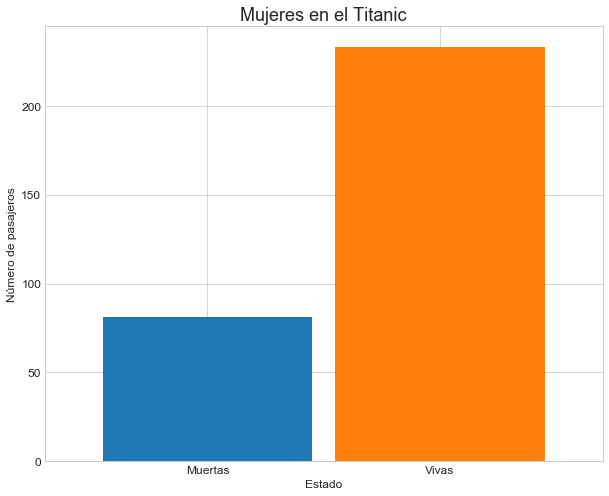

In [67]:
series = train[train["Sex"] == 'female']["Survived"].value_counts().sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Mujeres en el Titanic", fontsize=18)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Muertas", "Vivas"], fontsize=12, rotation=360)
plt.show()  

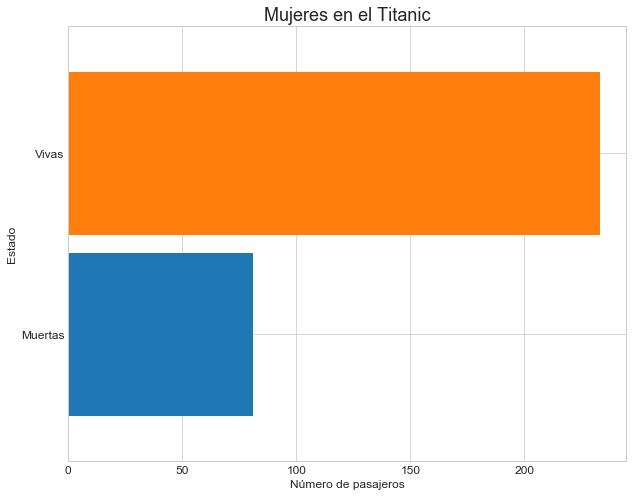

In [68]:
series = train[train["Sex"] == 'female']["Survived"].value_counts().sort_index()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Mujeres en el Titanic", fontsize=18)
plt.xlabel("Número de pasajeros", fontsize=12)
plt.ylabel("Estado", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1],  ["Muertas", "Vivas"], fontsize=12, rotation=360)
plt.show()  

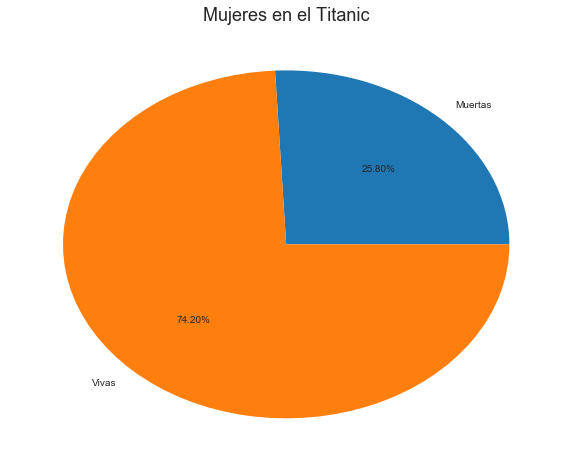

In [69]:
series = train[train["Sex"] == "female"]["Survived"].value_counts(normalize = True).sort_index()
series.plot.pie(labels = ["Muertas", "Vivas"],autopct='%.2f%%', shadow=False, figsize=(10,8))
plt.title("Mujeres en el Titanic", fontsize=18)
plt.ylabel("")
plt.show()  

**Comparativa entre géneros**

In [70]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)  

,Survived
Sex,
female,0.742038
male,0.188908


In [71]:
train.pivot_table(index = "Sex", values = "Survived").sort_index()

,Survived
Sex,
female,0.742038
male,0.188908


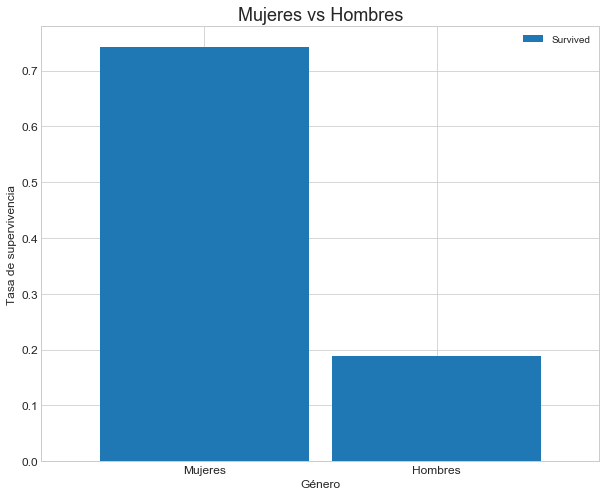

In [72]:
series = train.pivot_table(index = "Sex", values = "Survived").sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Mujeres vs Hombres", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Mujeres", "Hombres"], fontsize=12, rotation=360)
plt.show()  

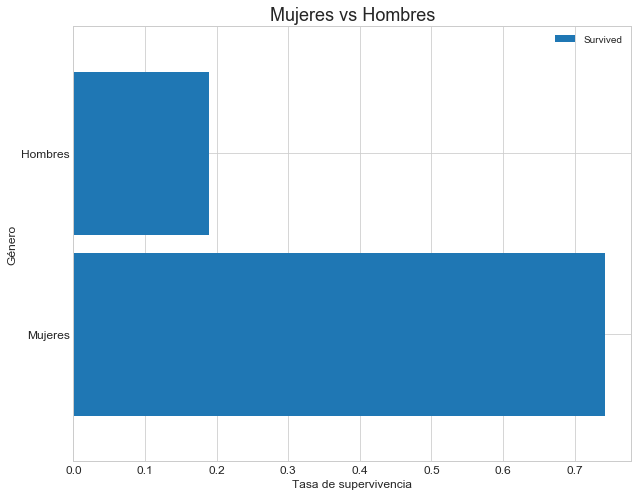

In [73]:
series = train.pivot_table(index = "Sex", values = "Survived").sort_index()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Mujeres vs Hombres", fontsize=18)
plt.xlabel("Tasa de supervivencia", fontsize=12)
plt.ylabel("Género", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1],  ["Mujeres", "Hombres"], fontsize=12, rotation=360)
plt.show()  

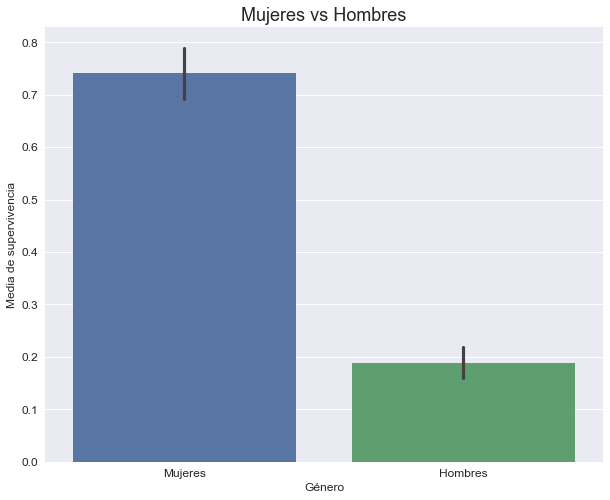

In [74]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(data=train, x="Sex", y="Survived", order= ["female", "male"])
plt.title("Mujeres vs Hombres", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Media de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Mujeres", "Hombres"], fontsize=12, rotation=360)
plt.show()  

## Feature: Pclass    

In [75]:
print("Pclass: {}".format(train["Pclass"].dtype))
print("Total: {}".format(train.shape[0]))
print("Values: {}".format(train["Pclass"].count()))
print("Empty: {}".format(train["Pclass"].isnull().sum()))
print("Mean: {}".format(train["Pclass"].mean()))                         

Pclass: int64
Total: 891
Values: 891
Empty: 0
Mean: 2.308641975308642


In [76]:
train["Pclass"].describe()        

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [77]:
# absolute numbers
train["Pclass"].value_counts().sort_index()              

1    216
2    184
3    491
Name: Pclass, dtype: int64

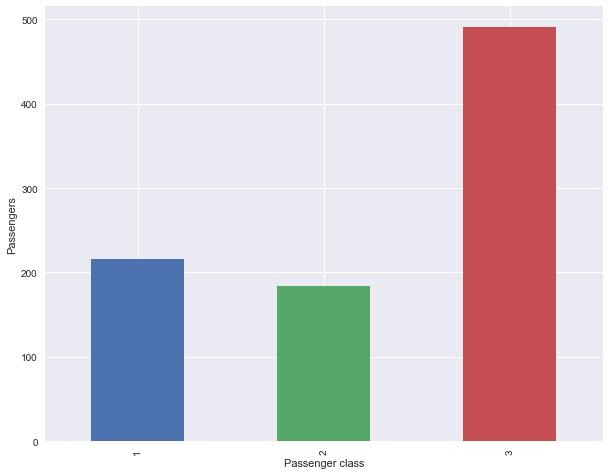

In [78]:
train["Pclass"].value_counts().sort_index().plot.bar(figsize=(10,8))
plt.xlabel("Passenger class")
plt.ylabel("Passengers")
plt.show()

In [79]:
# percentages
train["Pclass"].value_counts(normalize = True).sort_index()      

1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64

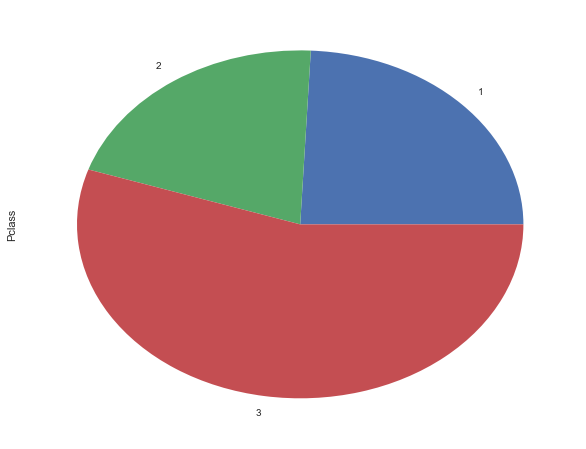

In [80]:
train["Pclass"].value_counts(normalize = True).sort_index().plot.pie(figsize=(10,8))
plt.show()

In [81]:
train.groupby(["Pclass"]).size().sort_index()
#train.groupby(["Pclass"]).size().sort_index()
#train.groupby(["Pclass"]).size().sort_values()
#train.groupby(["Pclass"]).size().sort_values(ascending=True)
#train.groupby(["Pclass"]).size().sort_values(ascending=False)

Pclass
1    216
2    184
3    491
dtype: int64

In [82]:
(train.groupby(["Pclass"]).size() / train["Pclass"].count()).sort_index()           

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

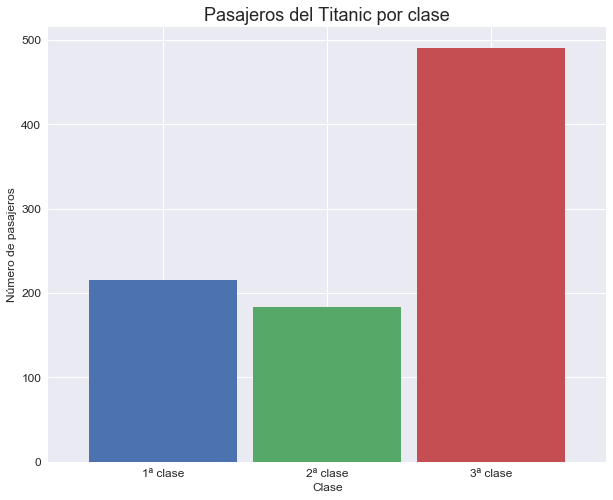

In [83]:
series = train["Pclass"].value_counts().sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Pasajeros del Titanic por clase", fontsize=18)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1,2],  ["1ª clase", "2ª clase", "3ª clase"], fontsize=12, rotation=360)
plt.show()   

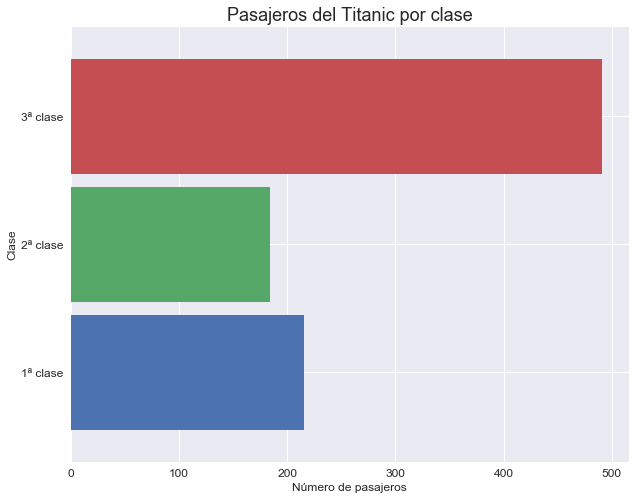

In [84]:
series = train["Pclass"].value_counts().sort_index()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Pasajeros del Titanic por clase", fontsize=18)
plt.xlabel("Número de pasajeros", fontsize=12)
plt.ylabel("Clase", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1,2],  ["1ª clase", "2ª clase", "3ª clase"], fontsize=12, rotation=360)
plt.show()   

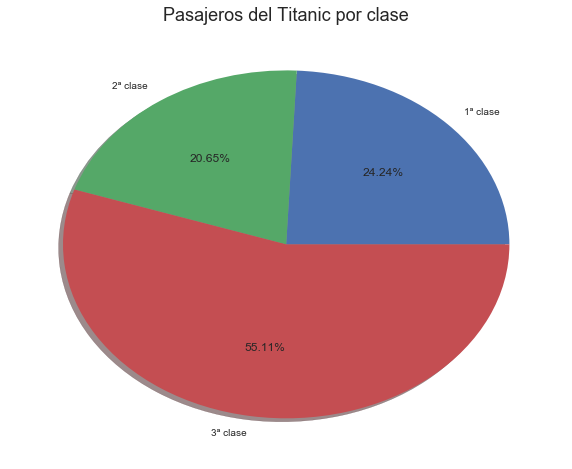

In [85]:
series = train["Pclass"].value_counts(normalize = True).sort_index()
series.plot.pie(labels = ["1ª clase", "2ª clase", "3ª clase"],autopct='%.2f%%', shadow=True, figsize=(10,8))
plt.title("Pasajeros del Titanic por clase", fontsize=18)
plt.ylabel("")
plt.show()     

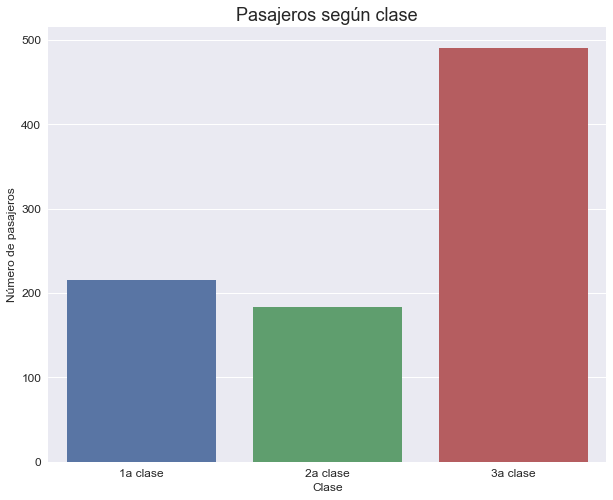

In [86]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(data=train, x="Pclass")
plt.title("Pasajeros según clase", fontsize=18)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1,2],  ["1a clase", "2a clase", "3a clase"], fontsize=12, rotation=360)
plt.show()

**¿Cuántos pasajeros de primera clase sobrevivieron?**

In [87]:
# First class passengers that survived vs that passed away
train[train["Pclass"] == 1]["Survived"].value_counts().sort_index()  

0     80
1    136
Name: Survived, dtype: int64

In [88]:
# First class passengers that survived vs that passed away (percentage)
train[train["Pclass"] == 1]["Survived"].value_counts(normalize = True).sort_index()

0    0.37037
1    0.62963
Name: Survived, dtype: float64

In [89]:
# First class passengers that survived vs that passed away
train[train["Pclass"] == 1].groupby("Survived").size().sort_index()   

Survived
0     80
1    136
dtype: int64

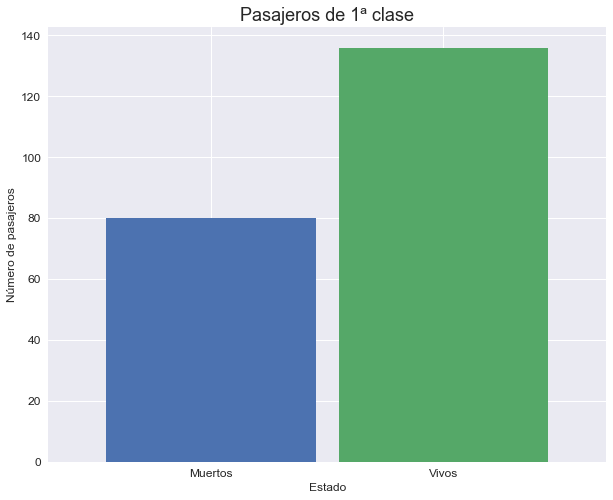

In [90]:
series = train[train["Pclass"] == 1]["Survived"].value_counts().sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Pasajeros de 1ª clase", fontsize=18)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()   

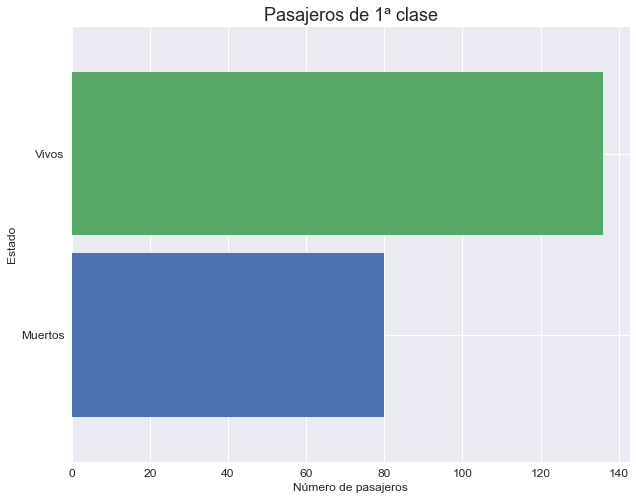

In [91]:
series = train[train["Pclass"] == 1]["Survived"].value_counts().sort_index()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Pasajeros de 1ª clase", fontsize=18)
plt.ylabel("Estado", fontsize=12)
plt.xlabel("Número de pasajeros", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()   

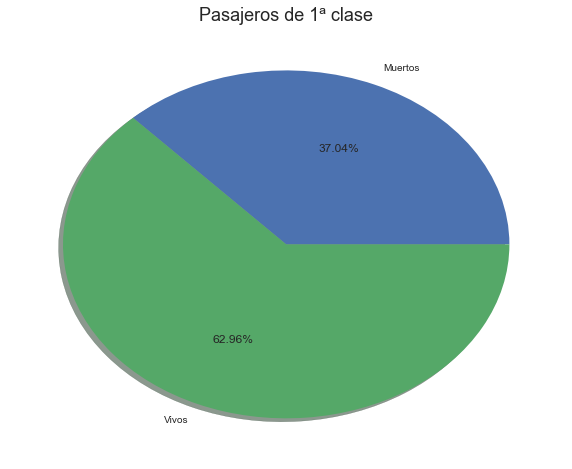

In [92]:
series = train[train["Pclass"] == 1]["Survived"].value_counts(normalize = True).sort_index()
series.plot.pie(labels = ["Muertos", "Vivos"],autopct='%.2f%%', shadow=True, figsize=(10,8))
plt.title("Pasajeros de 1ª clase", fontsize=18)
plt.ylabel("")  
plt.show()  

**¿Cuántos pasajeros de segunda clase sobrevivieron?**

In [93]:
# Second class passengers that survived vs that passed away
train[train["Pclass"] == 2]["Survived"].value_counts().sort_index() 

0    97
1    87
Name: Survived, dtype: int64

In [94]:
# Second class passengers that survived vs that passed away
train[train["Pclass"] == 2]["Survived"].value_counts(normalize = True)   

0    0.527174
1    0.472826
Name: Survived, dtype: float64

In [95]:
train[train["Pclass"] == 2].groupby("Survived").size().sort_index()   

Survived
0    97
1    87
dtype: int64

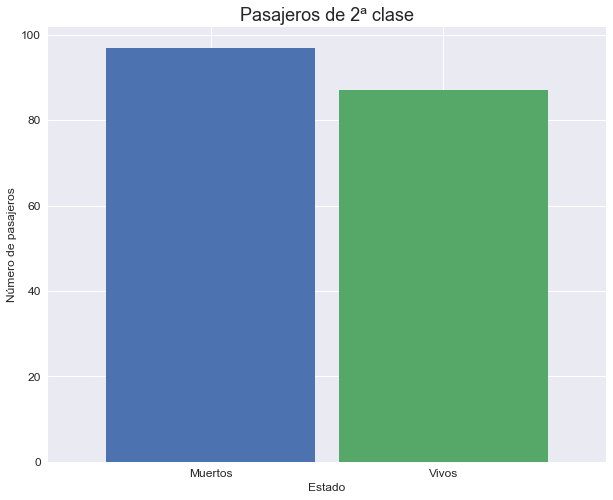

In [96]:
series = train[train["Pclass"] == 2]["Survived"].value_counts().sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Pasajeros de 2ª clase", fontsize=18)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()   

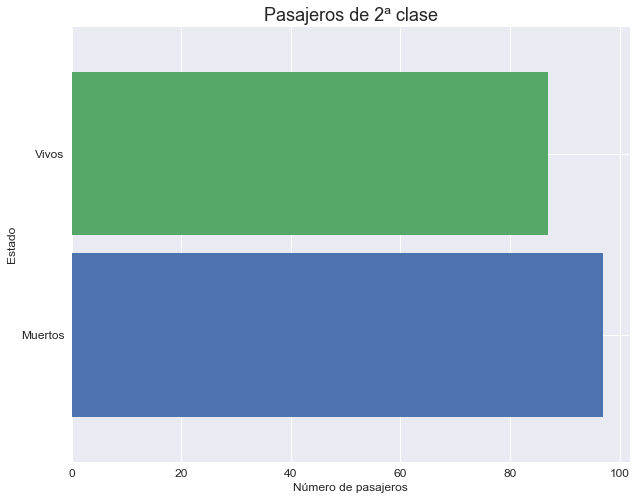

In [97]:
series = train[train["Pclass"] == 2]["Survived"].value_counts().sort_index()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Pasajeros de 2ª clase", fontsize=18)
plt.ylabel("Estado", fontsize=12)
plt.xlabel("Número de pasajeros", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()   

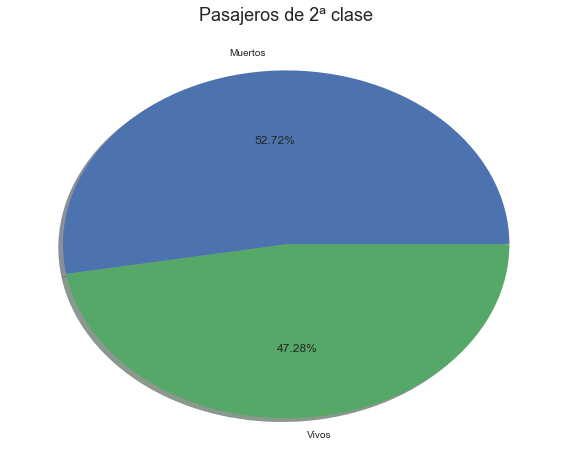

In [98]:
series = train[train["Pclass"] == 2]["Survived"].value_counts(normalize = True).sort_index()
series.plot.pie(labels = ["Muertos", "Vivos"],autopct='%.2f%%', shadow=True, figsize=(10,8))
plt.title("Pasajeros de 2ª clase", fontsize=18)
plt.ylabel("")  
plt.show()  

**¿Cuántos pasajeros de tercera clase sobrevivieron?**

In [99]:
# Third class passengers that survived vs that passed away  
train[train["Pclass"] == 3]["Survived"].value_counts().sort_index()     

0    372
1    119
Name: Survived, dtype: int64

In [100]:
# Third class passengers that survived vs that passed away
train[train["Pclass"] == 3]["Survived"].value_counts(normalize = True)     

0    0.757637
1    0.242363
Name: Survived, dtype: float64

In [101]:
train[train["Pclass"] == 3].groupby("Survived").size().sort_index()    

Survived
0    372
1    119
dtype: int64

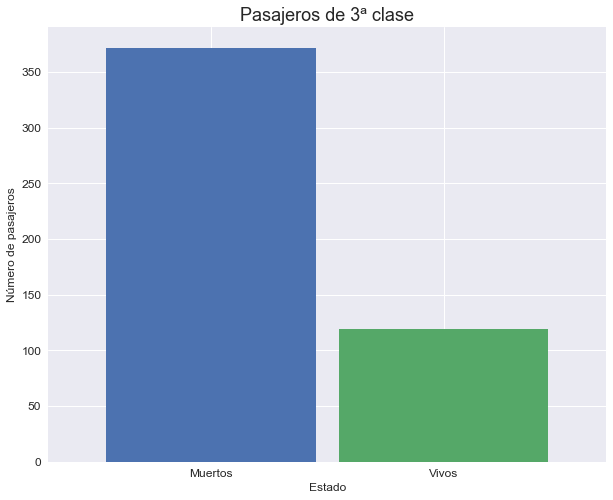

In [102]:
series = train[train["Pclass"] == 3]["Survived"].value_counts().sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Pasajeros de 3ª clase", fontsize=18)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()  

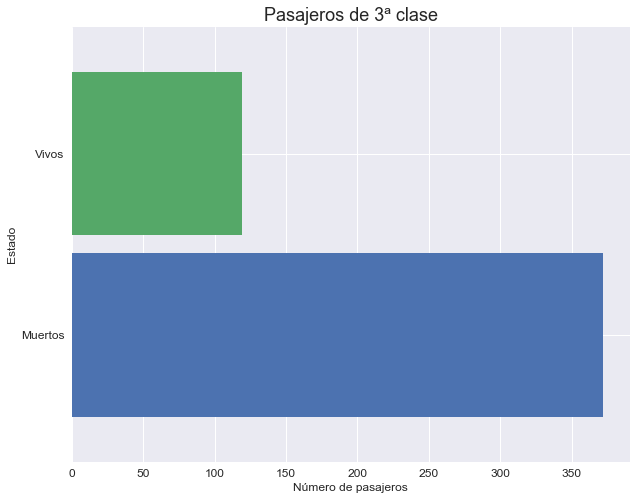

In [103]:
series = train[train["Pclass"] == 3]["Survived"].value_counts().sort_index()
series.plot.barh(width=0.9, figsize=(10,8))
plt.title("Pasajeros de 3ª clase", fontsize=18)
plt.ylabel("Estado", fontsize=12)
plt.xlabel("Número de pasajeros", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0,1],  ["Muertos", "Vivos"], fontsize=12, rotation=360)
plt.show()  

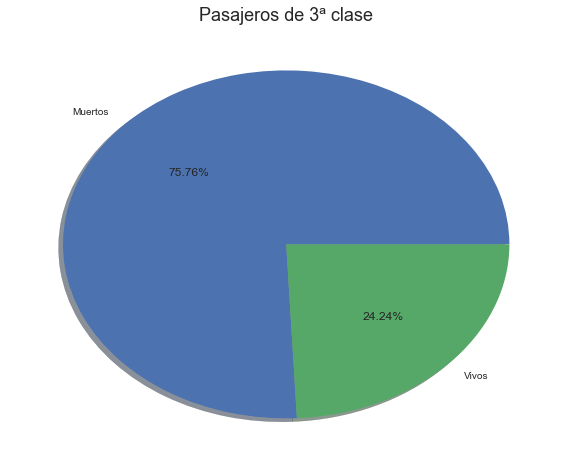

In [104]:
series = train[train["Pclass"] == 3]["Survived"].value_counts(normalize = True).sort_index()
series.plot.pie(labels = ["Muertos", "Vivos"],autopct='%.2f%%', shadow=True, figsize=(10,8))
plt.title("Pasajeros de 3ª clase", fontsize=18)
plt.ylabel("")
plt.show()  

**Comparativa entre clases**

In [105]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=True).mean().sort_index()   

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [106]:
train.pivot_table(index = "Pclass", values = "Survived").sort_index()              

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


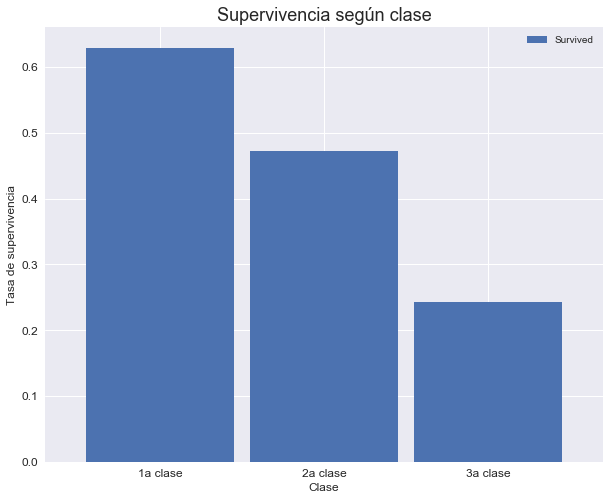

In [107]:
series = train.pivot_table(index = "Pclass", values = "Survived").sort_index()
series.plot.bar(width=0.9, figsize=(10,8))
plt.title("Supervivencia según clase", fontsize=18)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1,2],  ["1a clase", "2a clase", "3a clase"], fontsize=12, rotation=360)
plt.show()              

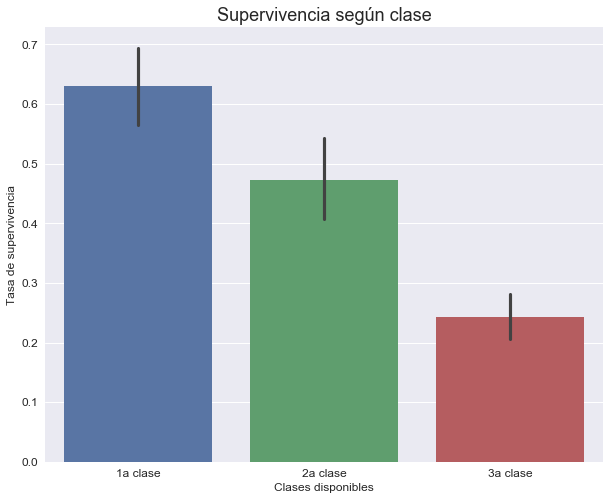

In [108]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(data=train, x="Pclass", y="Survived")
plt.title("Supervivencia según clase", fontsize=18)
plt.xlabel("Clases disponibles", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1,2],  ["1a clase", "2a clase", "3a clase"], fontsize=12, rotation=360)
plt.show()


**Comparaciones entre género, clase y survived**

In [109]:
train[["Sex", "Pclass", "Survived"]].groupby(["Sex", "Pclass"]).count()  

Survived
Sex    Pclass          
female 1             94
       2             76
       3            144
male   1            122
       2            108
       3            347

In [110]:
train[["Sex", "Pclass", "Survived"]].groupby(["Pclass", "Sex"]).count()     

Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347

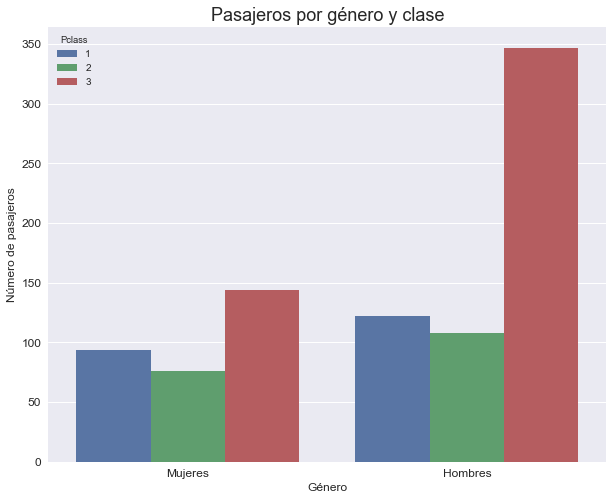

In [111]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(data=train, x="Sex", hue="Pclass", order=["female", "male"])
plt.title("Pasajeros por género y clase", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Mujeres", "Hombres"], fontsize=12, rotation=360)                   
plt.show()  

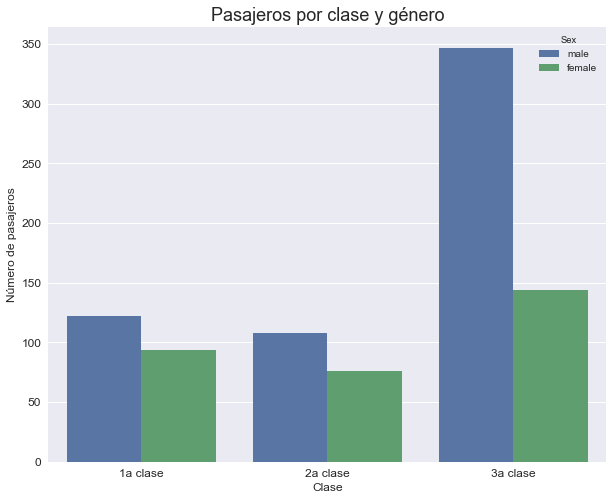

In [112]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(data=train, x="Pclass",  hue="Sex", order=[1,2,3])
plt.title("Pasajeros por clase y género", fontsize=18)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1,2],  ["1a clase", "2a clase", "3a clase"], fontsize=12, rotation=360)
plt.show()  

In [113]:
train[["Sex", "Pclass", "Survived"]].groupby(["Sex", "Pclass"]).mean()  

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [114]:
train[["Sex", "Pclass", "Survived"]].groupby(["Pclass", "Sex"]).mean()  

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

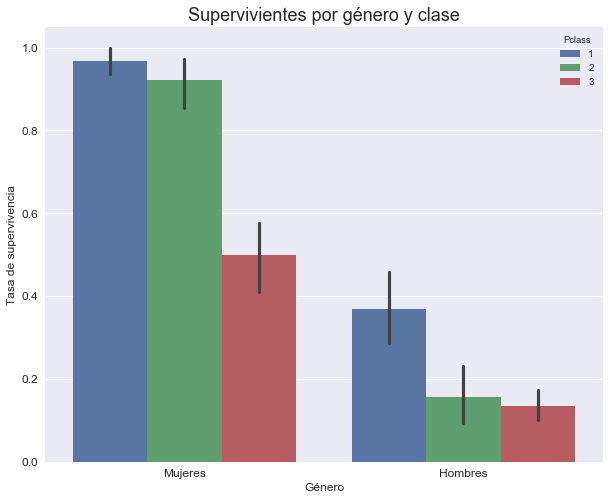

In [115]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(data=train, x="Sex", y="Survived", hue="Pclass", order=["female", "male"])
plt.title("Supervivientes por género y clase", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Mujeres", "Hombres"], fontsize=12, rotation=360)
plt.show()

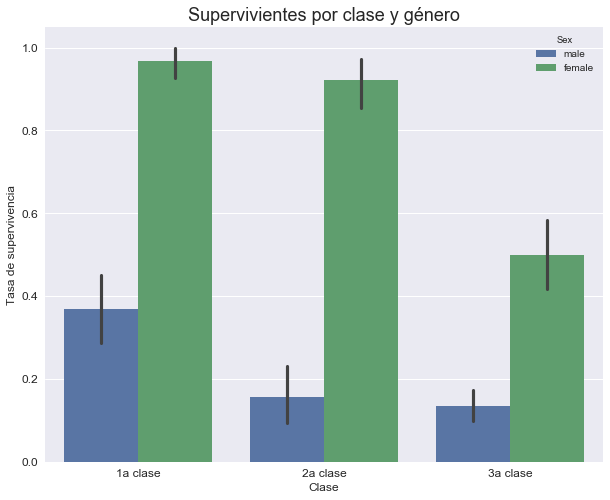

In [116]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(data=train, x="Pclass", y="Survived", hue="Sex")
plt.title("Supervivientes por clase y género", fontsize=18)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1,2],  ["1a clase", "2a clase", "3a clase"], fontsize=12, rotation=360)
plt.show()  

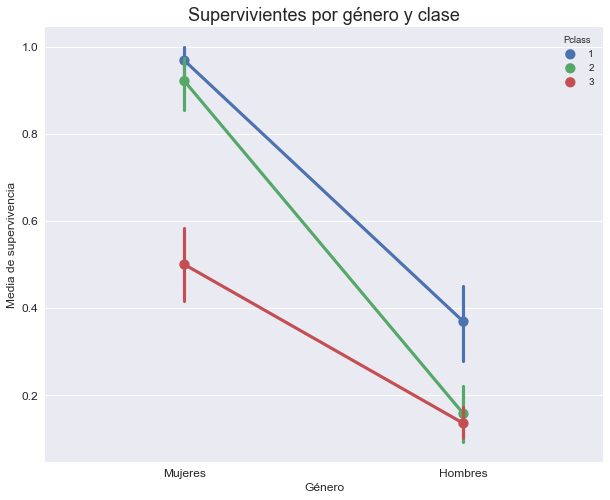

In [117]:
sns.set(rc={"figure.figsize":(10,8)})
sns.pointplot(data=train, x="Sex", y="Survived", hue="Pclass", order=["female", "male"])
plt.title("Supervivientes por género y clase", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Media de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Mujeres", "Hombres"], fontsize=12, rotation=360)
plt.show()  

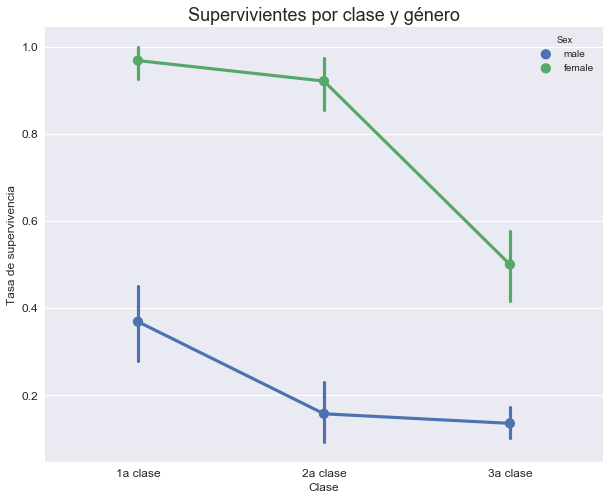

In [118]:
sns.set(rc={"figure.figsize":(10,8)})
sns.pointplot(data=train, x="Pclass", y="Survived", hue="Sex")
plt.title("Supervivientes por clase y género", fontsize=18)
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1,2],  ["1a clase", "2a clase", "3a clase"], fontsize=12, rotation=360)
plt.show()  

In [119]:
train.pivot_table(index=["Sex", "Pclass"], values="Survived")   

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [120]:
train.pivot_table(index=["Pclass", "Sex"], values="Survived")  

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [121]:
train.pivot_table(index="Pclass", columns = "Sex", values="Survived")

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


## Feature: Age  

In [122]:
print("Age: {}".format(train["Age"].dtype))
print("Total: {}".format(train.shape[0]))
print("Values: {}".format(train["Age"].count()))
print("Empty: {}".format(train["Age"].isnull().sum()))
print("Mean: {}".format(train["Age"].mean()))  

Age: float64
Total: 891
Values: 714
Empty: 177
Mean: 29.69911764705882


In [123]:
train["Age"].describe()   

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

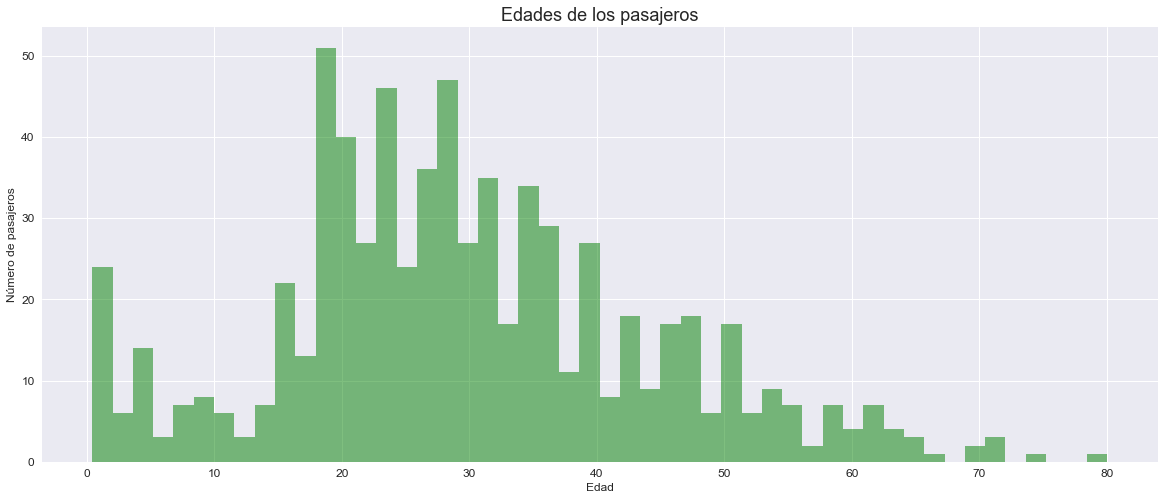

In [124]:
#One way to look at distribution of values in a continuous numerical set is to use a histogram
series = train["Age"]
series.plot.hist(alpha=0.5,color="green", bins=50, figsize=(20,8))
plt.title("Edades de los pasajeros", fontsize=18)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()


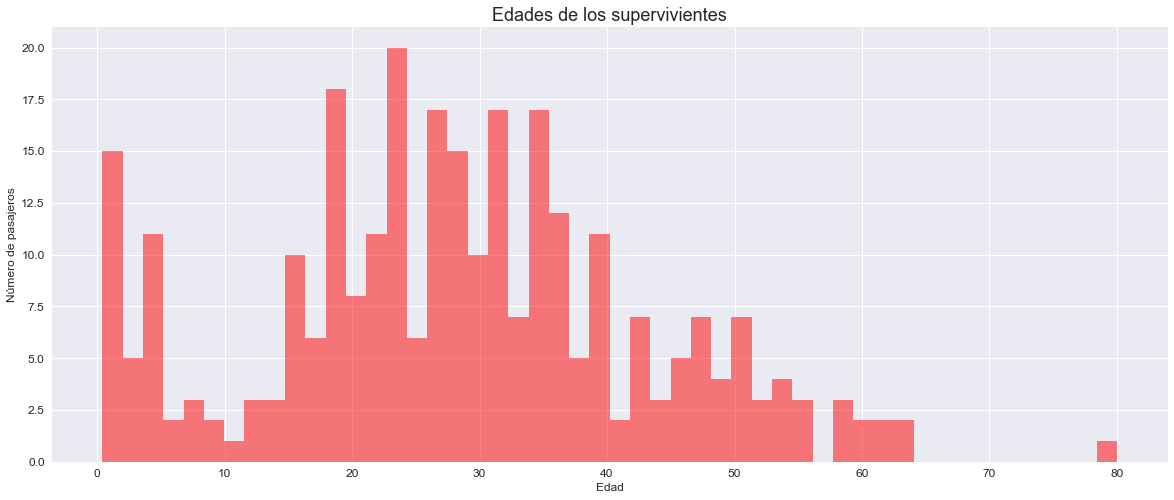

In [125]:
series = train[train["Survived"] == 1]["Age"]
series.plot.hist(alpha=0.5,color="red", bins=50, figsize=(20,8))
plt.title("Edades de los supervivientes", fontsize=18)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()


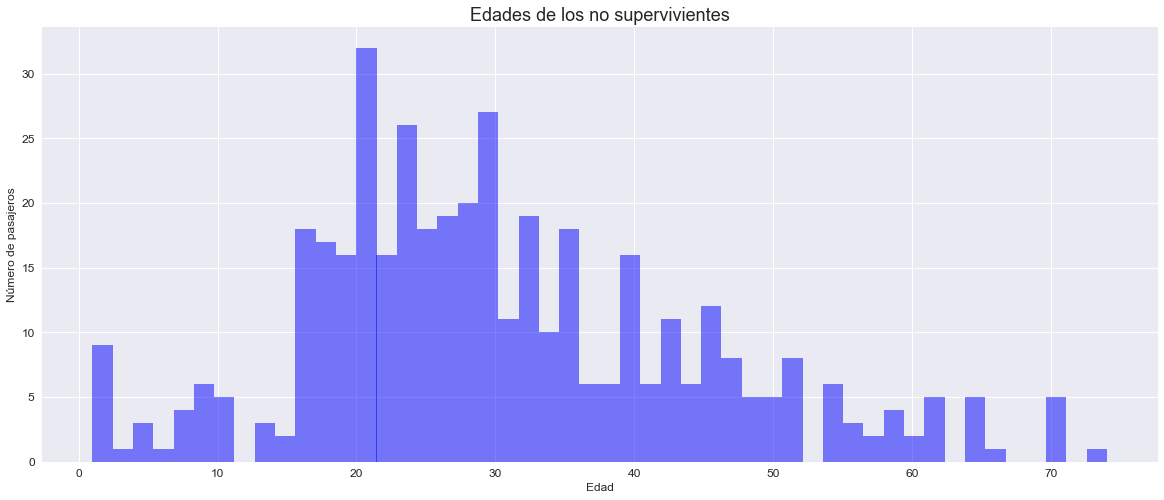

In [126]:
series = train[train["Survived"] == 0]["Age"]
series.plot.hist(alpha=0.5,color="blue", bins=50, figsize=(20,8))
plt.title("Edades de los no supervivientes", fontsize=18)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

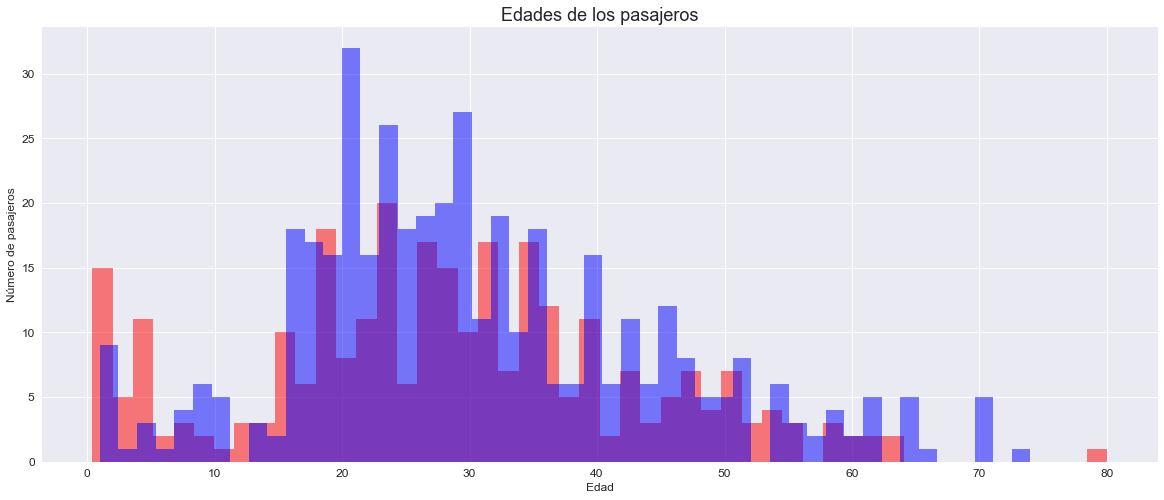

In [127]:
survived = train[train["Survived"] == 1]["Age"]
died = train[train["Survived"] == 0]["Age"]
survived.plot.hist(alpha=0.5,color="red", bins=50, figsize=(20,8))
died.plot.hist(alpha=0.5,color="blue", bins=50, figsize=(20,8))
plt.title("Edades de los pasajeros", fontsize=18)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

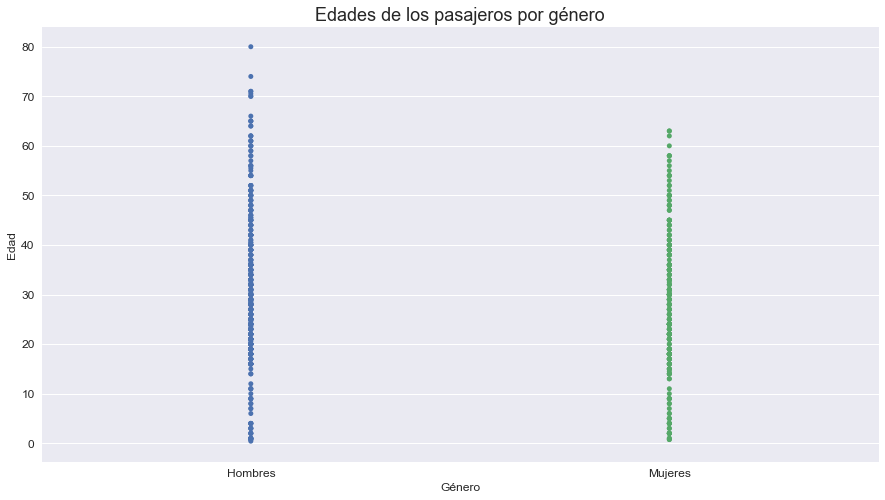

In [128]:
#https://seaborn.pydata.org/tutorial/categories
sns.set(rc={"figure.figsize":(15,8)})
sns.stripplot(data=train, x="Sex", y="Age", jitter = False)
plt.title("Edades de los pasajeros por género", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Hombres", "Mujeres"], fontsize=12, rotation=360)
plt.show()  

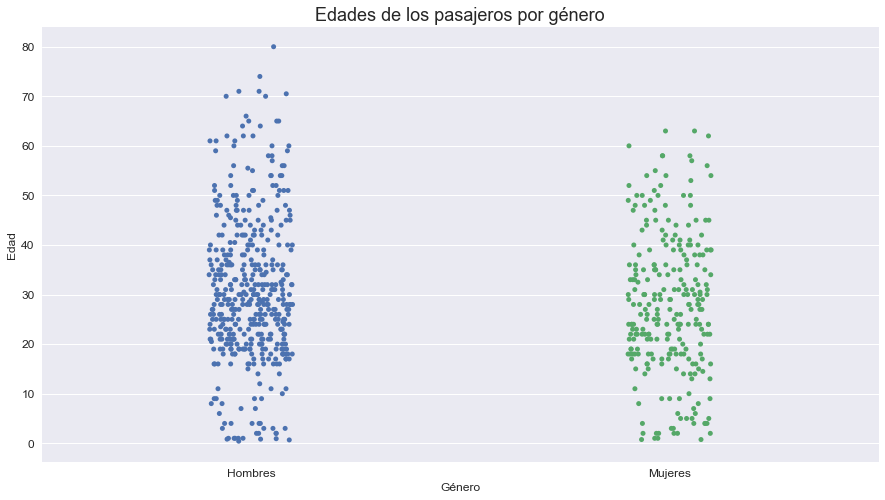

In [129]:
#https://seaborn.pydata.org/tutorial/categories
sns.set(rc={"figure.figsize":(15,8)})
sns.stripplot(data=train, x="Sex", y="Age", jitter = True)
plt.title("Edades de los pasajeros por género", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Hombres", "Mujeres"], fontsize=12, rotation=360)
plt.show()  

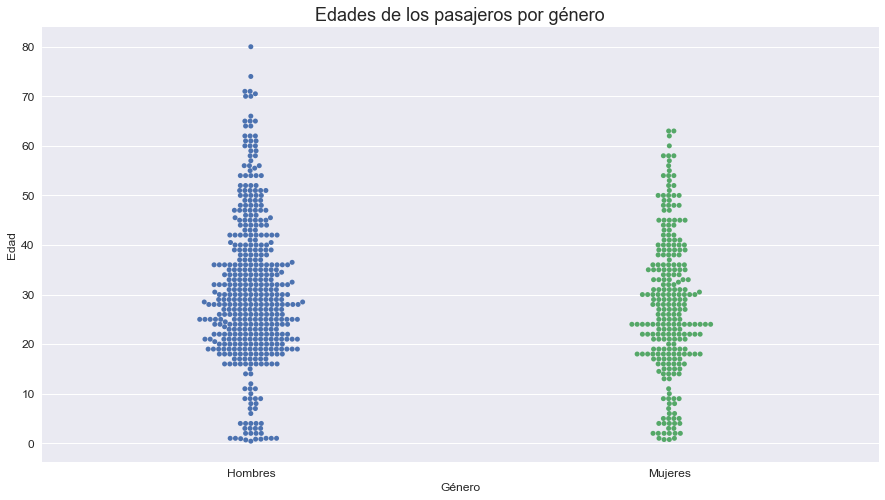

In [130]:
#https://seaborn.pydata.org/tutorial/categories
sns.set(rc={"figure.figsize":(15,8)})
sns.swarmplot(data=train, x="Sex", y="Age")
plt.title("Edades de los pasajeros por género", fontsize=18)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Hombres", "Mujeres"], fontsize=12, rotation=360)
plt.show() 

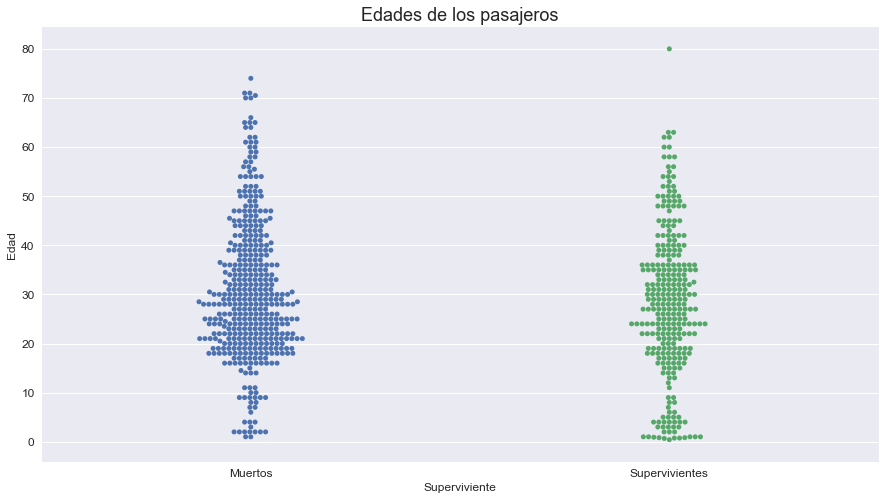

In [131]:
sns.set(rc={"figure.figsize":(15,8)})
sns.swarmplot(data=train, x="Survived", y="Age")
plt.title("Edades de los pasajeros", fontsize=18)
plt.xlabel("Superviviente", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Muertos", "Supervivientes"], fontsize=12, rotation=360)
plt.show()    

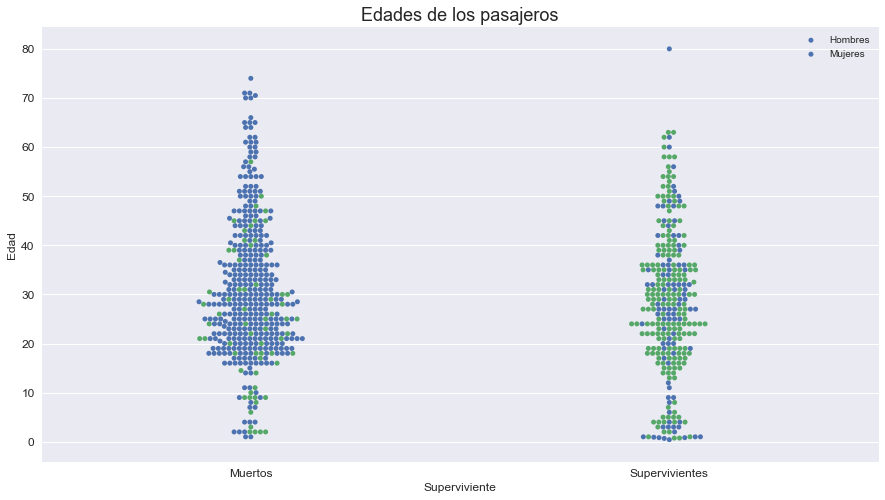

In [132]:
sns.set(rc={"figure.figsize":(15,8)})
sns.swarmplot(data=train, x="Survived", y="Age", hue="Sex")
plt.title("Edades de los pasajeros", fontsize=18)
plt.xlabel("Superviviente", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Muertos", "Supervivientes"], fontsize=12, rotation=360)
plt.legend(["Hombres", "Mujeres"])
plt.show() 

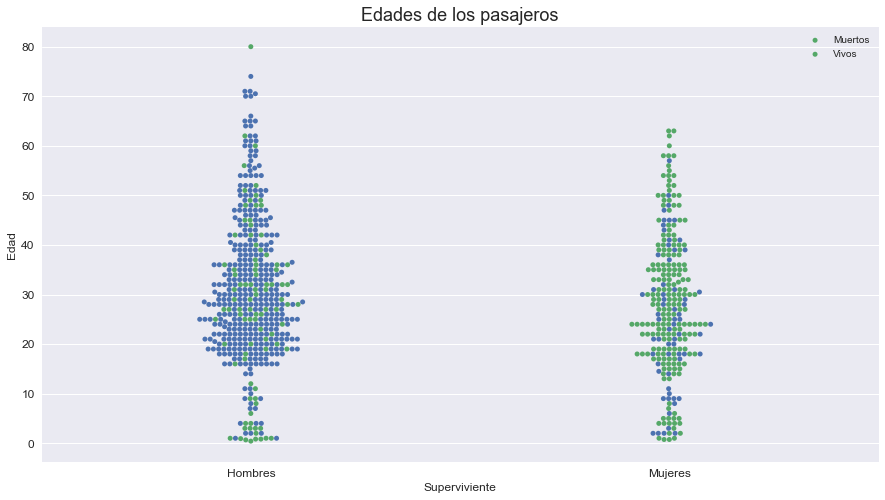

In [133]:
sns.set(rc={"figure.figsize":(15,8)})
sns.swarmplot(data=train, x="Sex", y="Age", hue="Survived")
plt.title("Edades de los pasajeros", fontsize=18)
plt.xlabel("Superviviente", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Hombres", "Mujeres"], fontsize=12, rotation=360)
plt.legend(["Muertos", "Vivos"])
plt.show()  

Most machine learning alghorims require all variables to have values in order to use it for training the model. 
The simplest method is to fill missing values with the average of the variable across all observations in the training set.

In [134]:
for dataframe in titanic:
    dataframe["Age"] = dataframe["Age"].fillna(np.random.randint(dataframe["Age"].mean() - dataframe["Age"].std(), dataframe["Age"].mean() + dataframe["Age"].std()));

cut_points = [0,5,12,18,35,60,100]
label_names = ["Infant", "Child","Teenager", "YoungAdult", "Adult", "Senior"]
for dataframe in titanic:
    dataframe["Age"] = pd.cut(dataframe["Age"], cut_points, labels = label_names)

In [135]:
train["Age"].describe()    

count            891
unique             6
top       YoungAdult
freq             535
Name: Age, dtype: object

In [136]:
print("Age: {}".format(train["Age"].dtype))
print("Total: {}".format(train.shape[0]))
print("Values: {}".format(train["Age"].count()))
print("Empty: {}".format(train["Age"].isnull().sum()))

Age: category
Total: 891
Values: 891
Empty: 0


In [137]:
train["Age"].value_counts().sort_index()   

Infant         44
Child          25
Teenager       70
YoungAdult    535
Adult         195
Senior         22
Name: Age, dtype: int64

In [138]:
train[["Age", "Survived"]].groupby(["Age"]).count()  

,Survived
Age,
Infant,44
Child,25
Teenager,70
YoungAdult,535
Adult,195
Senior,22


In [139]:
train[["Age", "Survived"]].groupby(["Age"]).mean()  

,Survived
Age,
Infant,0.704545
Child,0.360000
Teenager,0.428571
YoungAdult,0.353271
Adult,0.400000
Senior,0.227273


In [140]:
train["Age"].value_counts(normalize = True).sort_index()

Infant        0.049383
Child         0.028058
Teenager      0.078563
YoungAdult    0.600449
Adult         0.218855
Senior        0.024691
Name: Age, dtype: float64

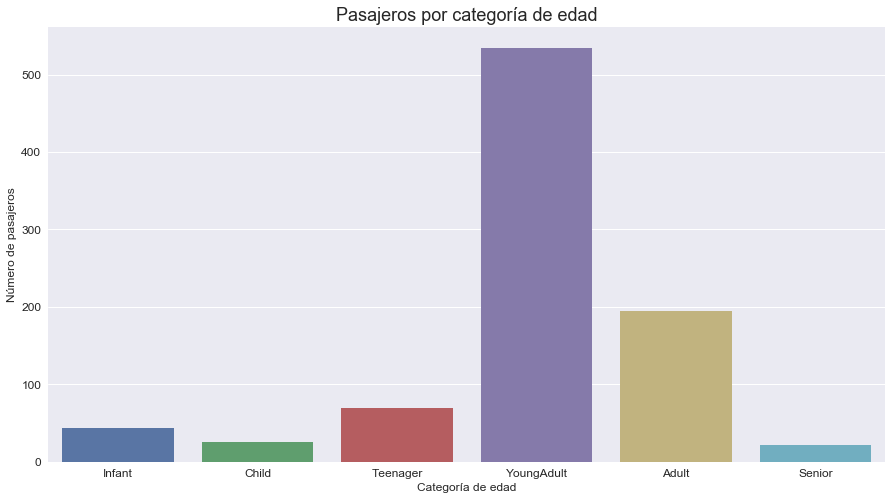

In [141]:
sns.set(rc={"figure.figsize":(15,8)})
sns.countplot(data=train, x="Age")
plt.title("Pasajeros por categoría de edad", fontsize=18)
plt.xlabel("Categoría de edad", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

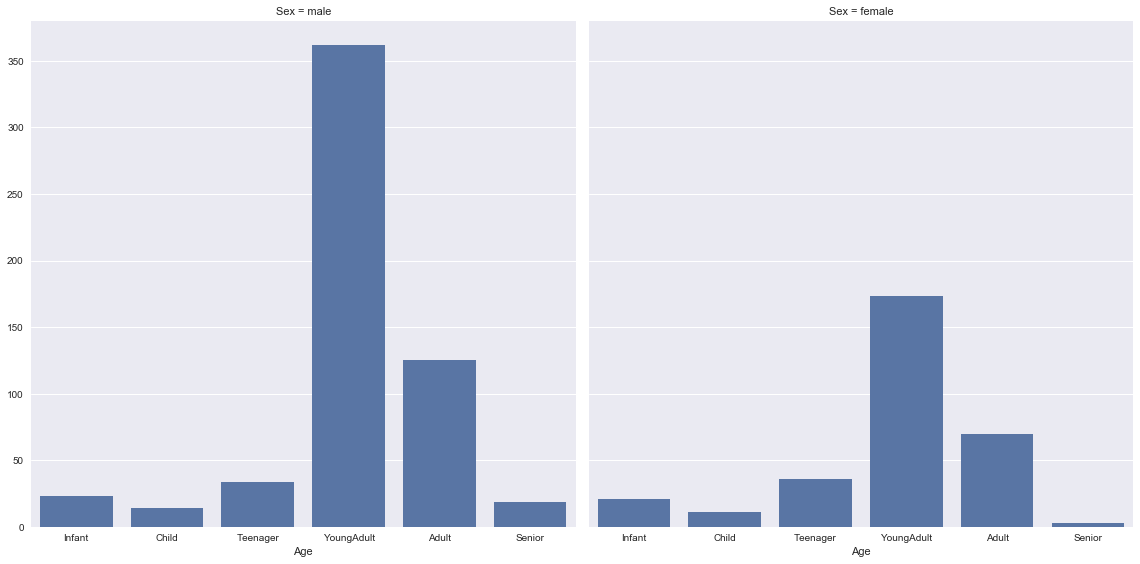

In [142]:
grid = sns.FacetGrid(train, col="Sex", size = 8)
grid.map(sns.countplot, "Age", order=["Infant", "Child", "Teenager", "YoungAdult", "Adult", "Senior"])
plt.show()

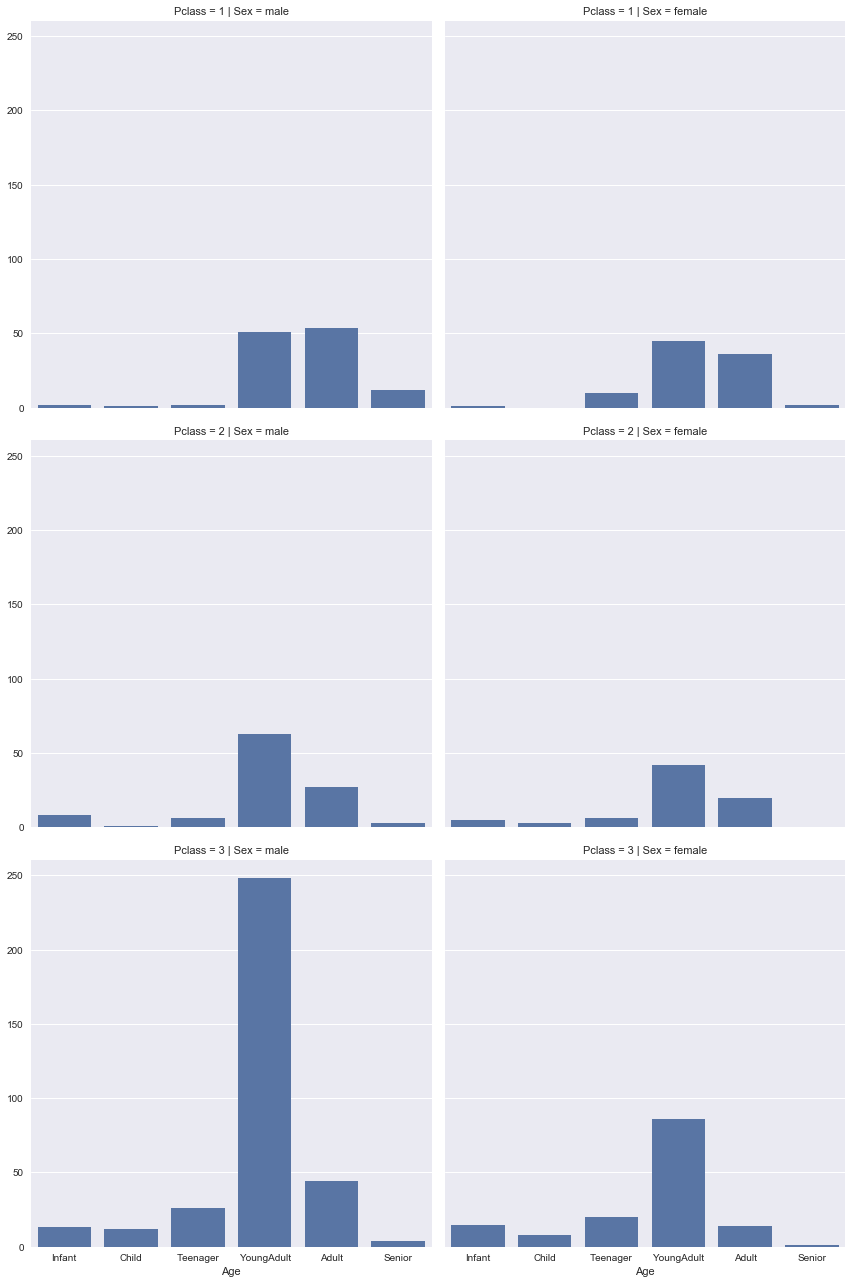

In [143]:
grid = sns.FacetGrid(train, col="Sex", row="Pclass", size = 6)
grid.map(sns.countplot, "Age", order=["Infant", "Child", "Teenager", "YoungAdult", "Adult", "Senior"])
plt.show()

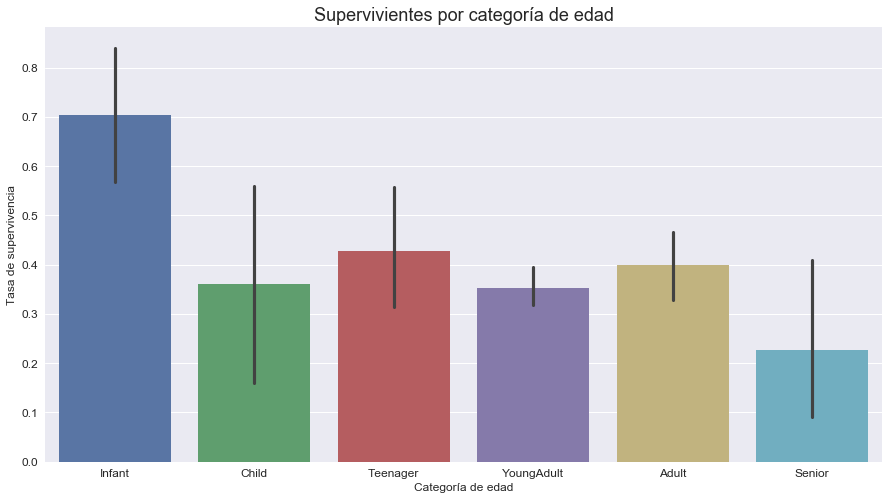

In [144]:
sns.set(rc={"figure.figsize":(15,8)})
sns.barplot(data=train, x="Age", y="Survived")
plt.title("Supervivientes por categoría de edad", fontsize=18)
plt.xlabel("Categoría de edad", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

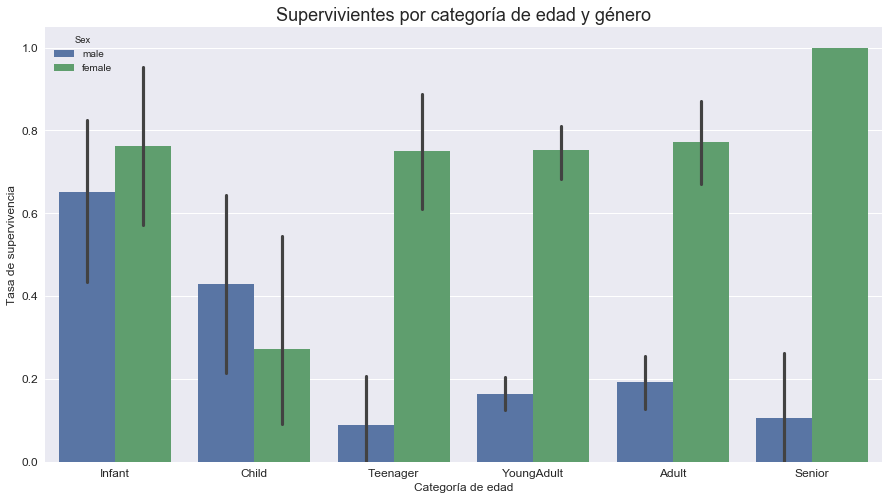

In [145]:
sns.set(rc={"figure.figsize":(15,8)})
sns.barplot(data=train, x="Age", y="Survived", hue="Sex")
plt.title("Supervivientes por categoría de edad y género", fontsize=18)
plt.xlabel("Categoría de edad", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

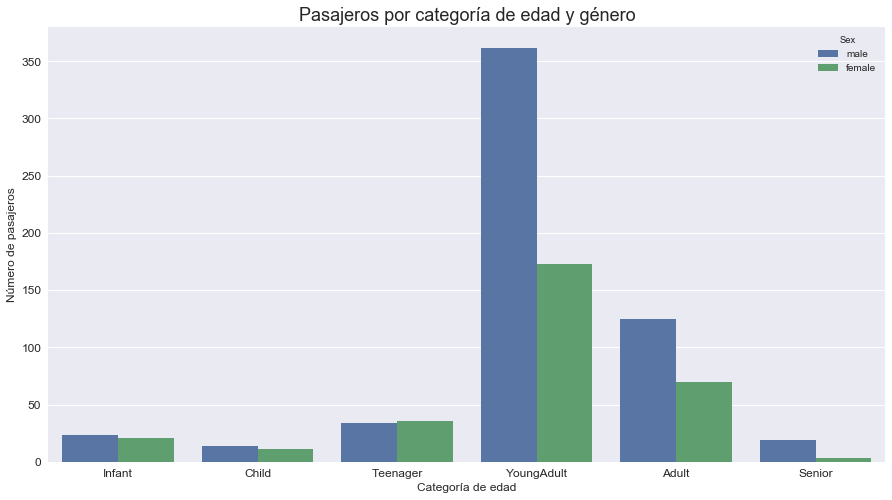

In [146]:
sns.set(rc={"figure.figsize":(15,8)})
sns.countplot(data=train, x="Age", hue="Sex")
plt.title("Pasajeros por categoría de edad y género", fontsize=18)
plt.xlabel("Categoría de edad", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

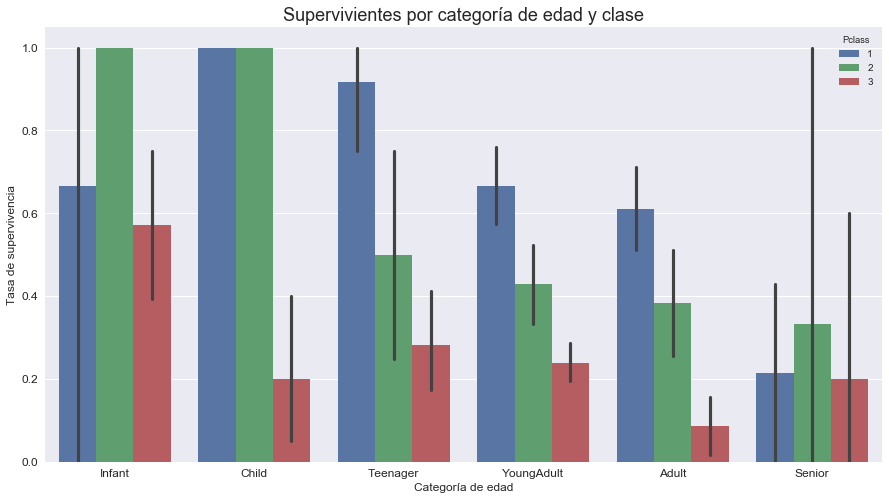

In [147]:
sns.set(rc={"figure.figsize":(15,8)})
sns.barplot(data=train, x="Age", y="Survived", hue="Pclass")
plt.title("Supervivientes por categoría de edad y clase", fontsize=18)
plt.xlabel("Categoría de edad", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

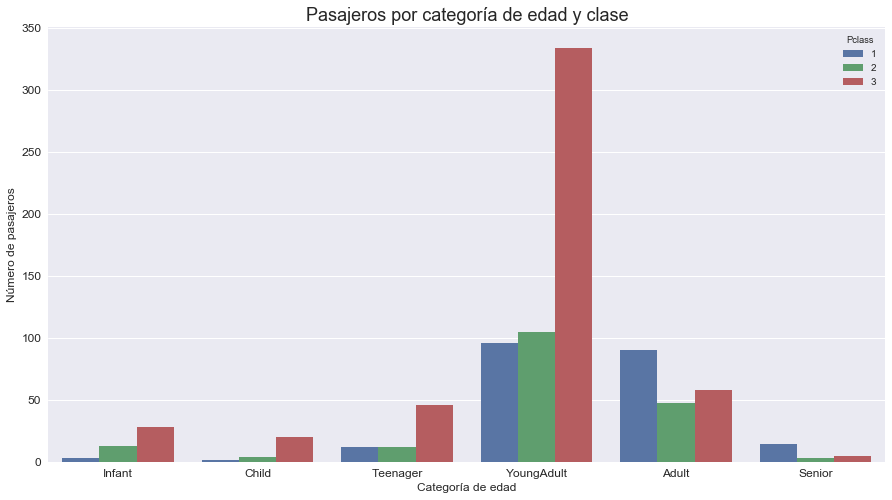

In [148]:
sns.set(rc={"figure.figsize":(15,8)})
sns.countplot(data=train, x="Age",hue="Pclass")
plt.title("Pasajeros por categoría de edad y clase", fontsize=18)
plt.xlabel("Categoría de edad", fontsize=12)
plt.ylabel("Número de pasajeros", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show() 

In [149]:
train[(train["Age"] == "Infant") & (train["Pclass"] == 1) & (train["Survived"] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,Infant,1,2,113781,151.55,C22 C26,S


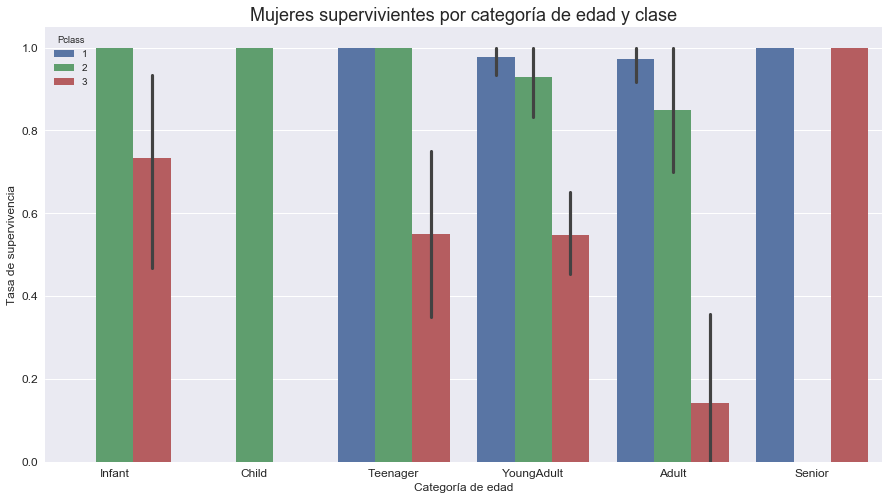

In [150]:
sns.set(rc={"figure.figsize":(15,8)})
sns.barplot(data=train[train["Sex"] == "female"], x="Age", y="Survived", hue="Pclass")
plt.title("Mujeres supervivientes por categoría de edad y clase", fontsize=18)
plt.xlabel("Categoría de edad", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

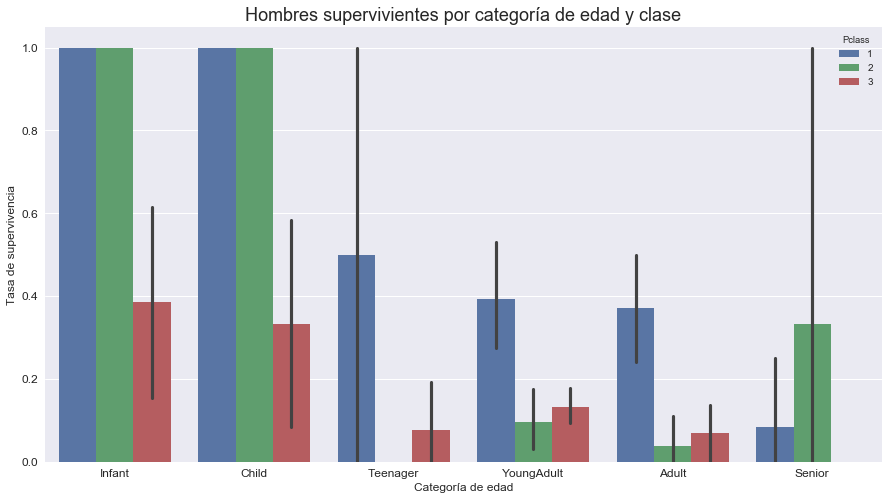

In [151]:
sns.set(rc={"figure.figsize":(15,8)})
sns.barplot(data=train[train["Sex"] == "male"], x="Age", y="Survived", hue="Pclass")
plt.title("Hombres supervivientes por categoría de edad y clase", fontsize=18)
plt.xlabel("Categoría de edad", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=360)
plt.show()  

## Feature: Embarked  

In [152]:
print("Pclass: {}".format(train["Embarked"].dtype))
print("Total: {}".format(train.shape[0]))
print("Values: {}".format(train["Embarked"].count()))
print("Empty: {}".format(train["Embarked"].isnull().sum()))

Pclass: object
Total: 891
Values: 889
Empty: 2


In [153]:
train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [154]:
#En este caso lo más típico es asignar el valor más repetido
for dataframe in titanic:
    dataframe["Embarked"] = dataframe["Embarked"].fillna(train["Embarked"].describe().top)

In [155]:
train["Embarked"].value_counts().sort_values()

Q     77
C    168
S    646
Name: Embarked, dtype: int64

In [156]:
train["Embarked"].value_counts(normalize = True).sort_values()

Q    0.086420
C    0.188552
S    0.725028
Name: Embarked, dtype: float64

In [157]:
train[train["Embarked"] == "S"]["Survived"].value_counts()


0    427
1    219
Name: Survived, dtype: int64

In [158]:
train[train["Embarked"] == "S"]["Survived"].value_counts(normalize = True)

0    0.660991
1    0.339009
Name: Survived, dtype: float64

In [159]:
train.pivot_table(index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [160]:
train[["Embarked", "Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


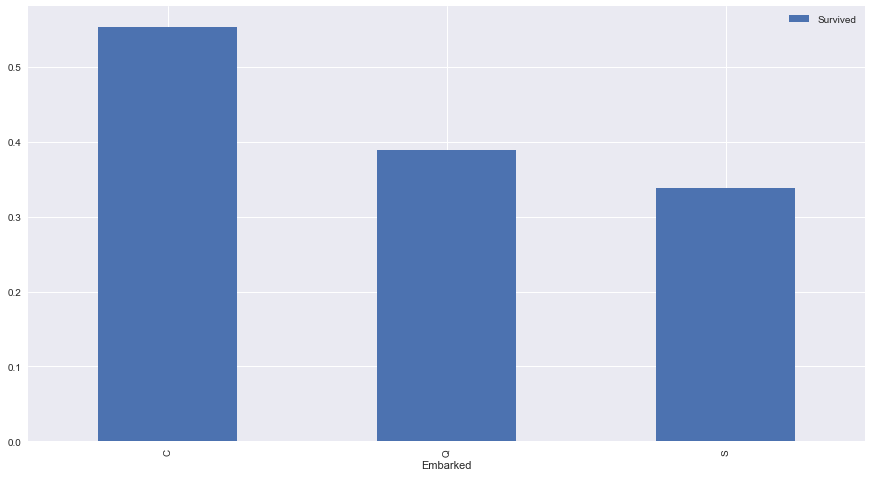

In [161]:
train[["Embarked", "Survived"]].groupby("Embarked").mean().plot.bar()
plt.show()

C:\Users\JORDI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\JORDI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


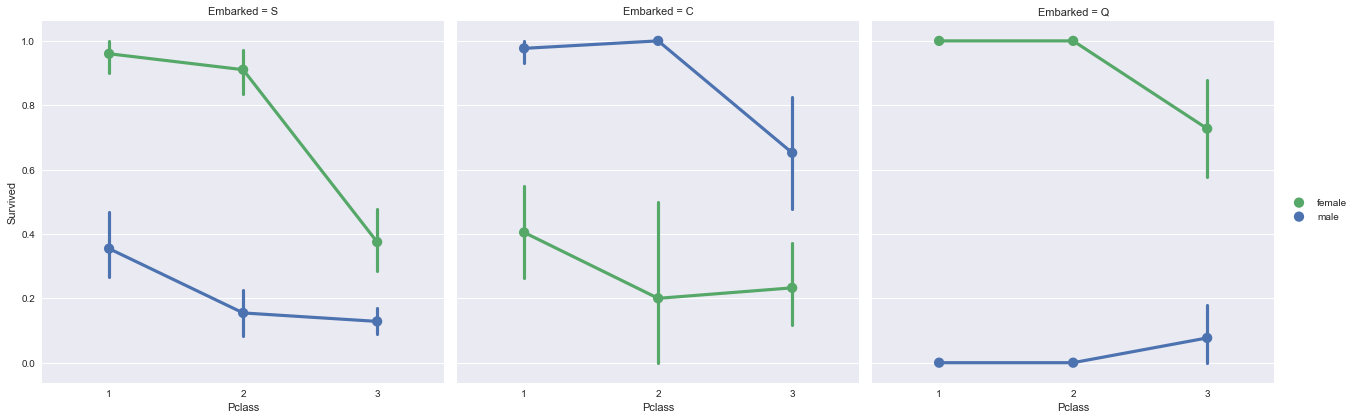

In [162]:
grid = sns.FacetGrid(train, col="Embarked", size=6, aspect=1)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex",palette="deep")
grid.add_legend()
plt.show()

### Creating new features extracting from existing

In [163]:
for dataframe in titanic:
    dataframe["IsAlone"] = ((dataframe["SibSp"] + dataframe["Parch"]) == 0)  

In [164]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,YoungAdult,0,0,239853,0.0000,NaN,S,True
789,790,0,1,"Guggenheim, Mr. Benjamin",male,Adult,0,0,PC 17593,79.2000,B82 B84,C,True
270,271,0,1,"Cairns, Mr. Alexander",male,YoungAdult,0,0,113798,31.0000,NaN,S,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,YoungAdult,1,2,W./C. 6607,23.4500,NaN,S,False
883,884,0,2,"Banfield, Mr. Frederick James",male,YoungAdult,0,0,C.A./SOTON 34068,10.5000,NaN,S,True
349,350,0,3,"Dimic, Mr. Jovan",male,Adult,0,0,315088,8.6625,NaN,S,True
745,746,0,1,"Crosby, Capt. Edward Gifford",male,Senior,1,1,WE/P 5735,71.0000,B22,S,False
499,500,0,3,"Svensson, Mr. Olof",male,YoungAdult,0,0,350035,7.7958,NaN,S,True
851,852,0,3,"Svensson, Mr. Johan",male,Senior,0,0,347060,7.7750,NaN,S,True
463,464,0,2,"Milling, Mr. Jacob Christian",male,Adult,0,0,234360,13.0000,NaN,S,True


In [165]:
train["IsAlone"].value_counts().sort_index()

False    354
True     537
Name: IsAlone, dtype: int64

In [166]:
train.pivot_table(index = "IsAlone", values= "Survived")

,Survived
IsAlone,
False,0.505650
True,0.303538


In [167]:
train.pivot_table(index=["Sex", "IsAlone"], values="Survived")

Survived
Sex    IsAlone          
female False    0.712766
       True     0.785714
male   False    0.271084
       True     0.155718

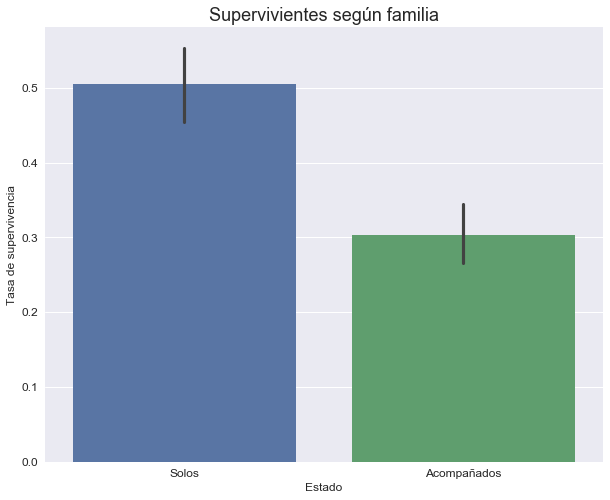

In [168]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(data=train, x="IsAlone", y="Survived")
plt.title("Supervivientes según familia", fontsize=18)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Solos", "Acompañados"], fontsize=12, rotation=360)
plt.show()   

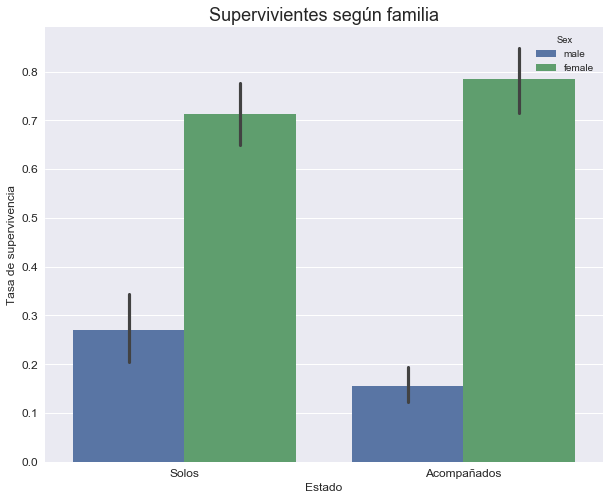

In [169]:
sns.set(rc={"figure.figsize":(10,8)})
sns.barplot(data=train, x="IsAlone", y="Survived", hue="Sex")
plt.title("Supervivientes según familia", fontsize=18)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Tasa de supervivencia", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0,1],  ["Solos", "Acompañados"], fontsize=12, rotation=360)
plt.show()  

### Prepare our data for machine learning

In [170]:
 pd.get_dummies(train["Age"], prefix="Age")  

,Age_Infant,Age_Child,Age_Teenager,Age_YoungAdult,Age_Adult,Age_Senior
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,0,0,1,0
7,1,0,0,0,0,0
8,0,0,0,1,0,0
9,0,0,1,0,0,0


In [171]:
for column in ["Pclass", "Sex", "Age", "Embarked", "IsAlone"]:
    train = pd.concat([train, pd.get_dummies(train[column], prefix=column)], axis = 1)         
    test = pd.concat([test, pd.get_dummies(test[column], prefix=column)], axis = 1)    

titanic = [train,test]

In [172]:
train.sample(2)         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Child,Age_Teenager,Age_YoungAdult,Age_Adult,Age_Senior,Embarked_C,Embarked_Q,Embarked_S,IsAlone_False,IsAlone_True
113,114,0,3,"Jussila, Miss. Katriina",female,YoungAdult,1,0,4136,9.825,...,0,0,1,0,0,0,0,1,1,0
460,461,1,1,"Anderson, Mr. Harry",male,Adult,0,0,19952,26.550,...,0,0,0,1,0,0,0,1,0,1


In [173]:
test.sample(2)  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_Child,Age_Teenager,Age_YoungAdult,Age_Adult,Age_Senior,Embarked_C,Embarked_Q,Embarked_S,IsAlone_False,IsAlone_True
107,999,3,"Ryan, Mr. Edward",male,Teenager,0,0,383162,7.75,NaN,...,0,1,0,0,0,0,1,0,0,1
221,1113,3,"Reynolds, Mr. Harold J",male,YoungAdult,0,0,342684,8.05,NaN,...,0,0,1,0,0,0,0,1,0,1


In [174]:
train = train.drop(["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "IsAlone"], axis = 1)
test = test.drop(["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "IsAlone"], axis = 1)
titanic = [train,test]  

In [175]:
train.sample(2)

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Infant,Age_Child,Age_Teenager,Age_YoungAdult,Age_Adult,Age_Senior,Embarked_C,Embarked_Q,Embarked_S,IsAlone_False,IsAlone_True
635,636,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1
798,799,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [176]:
test.sample(3)

,PassengerId,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Infant,Age_Child,Age_Teenager,Age_YoungAdult,Age_Adult,Age_Senior,Embarked_C,Embarked_Q,Embarked_S,IsAlone_False,IsAlone_True
127,1019,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
11,903,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
72,964,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1


## Creating our first machine learning model

Now that our data has been prepared, we are ready to train our first model. The first model we will use is called Logistic Regression, which is often the first model you will train when performing classification.

We will be using the scikit-learn library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:

* Instantiate (or create) the specific machine learning model you want to use
* Fit the model to the training data
* Use the model to make predictions
* Evaluate the accuracy of the predictions

Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the LogisticRegression class.

**A entrenar nuestro modelo**

In [177]:
model = LogisticRegression()
model.fit(train.iloc[:, 2:], train["Survived"])  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
train_X, test_X, train_Y, test_Y = train_test_split(train.iloc[:, 2:], train["Survived"], test_size=0.20,random_state=0)  

In [179]:
model = LogisticRegression()
model.fit(train_X, train_Y)                          
predictions = model.predict(test_X)

In [180]:
accuracy = accuracy_score(test_Y, predictions)
print("Accuracy: {}".format(accuracy))  

Accuracy: 0.8100558659217877


**Cross-validation: k-fold cross validation**

In [181]:
model = LogisticRegression()
scores = cross_val_score(model, train.iloc[:, 2:], train["Survived"], cv=10)
scores.sort()
accuracy = scores.mean()

print("Puntuaciones: {}".format(scores))
print("Precision: {}".format(accuracy))   

Puntuaciones: [0.76404494 0.7752809  0.78651685 0.78651685 0.78651685 0.8
 0.80681818 0.82022472 0.83333333 0.87640449]
Precision: 0.8035657133129043


**Making predictions on unseen data**

In [182]:
model = LogisticRegression() 
model.fit(train.iloc[:, 2:], train["Survived"])  
kaggle_predictions = model.predict(test.iloc[:,1:])

In [183]:
test_ids = test["PassengerId"]
submission_df = {"PassengerId": test_ids, "Survived": kaggle_predictions}
submission = pd.DataFrame(submission_df) 

In [184]:
submission.to_csv("submission.csv",index=False) 